### Data Science Salaries 2024 

## Data Cleaning

The dataset used is the [**Data Science Salaries 2024**](https://www.kaggle.com/datasets/sazidthe1/data-science-salaries), a dataset containing informations such as salary, work model, employment type and more about data scientists in all of the world. The author **Sazidul Islam** has done a great job in cleaning the data, but some minor changes are needed.

First of all, let"s import all the libraries I are gonna use.

In [259]:
#importing libraries

from os import getcwd #to get the working directory through getcwd

from pandas import * #to manipulate dataframes

import geopandas as gpd #for choropleth maps

from plotnine import *
from numpy import *
from plotnine.stats import * #for data visualization and data transformation

from statistics import * #to get all of the statistical functions needed

I downloaded the data and moved it into the working directory. It is in the .csv format, so I"m gonna use the function read_csv to read the file and store it in a pandas dataframe.

In [260]:
path_to_data = getcwd() + r"\data_science_salaries.csv" #setting path to data

data = read_csv(path_to_data, sep = ",") #creating pandas dataframe

print("Number of rows: ", len(data)) #printing number of rows

Number of rows:  6599


In [261]:
data.head() #printing quick view of data

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


The number of rows is 6599, a really big amount of data. First thing that comes into my eyes, are the capitalized first letters of every word, and the diversity in the job_title column.

In [262]:
data["job_title"].value_counts() #printing absolute frequencies of job titles

job_title
Data Engineer                      1307
Data Scientist                     1243
Data Analyst                        910
Machine Learning Engineer           629
Analytics Engineer                  246
                                   ... 
Data Science Tech Lead                1
Staff Machine Learning Engineer       1
Cloud Data Architect                  1
Marketing Data Engineer               1
Sales Data Analyst                    1
Name: count, Length: 132, dtype: int64

Since the data job market it's relatively young, job titles aren't as fixed as in other industries. This means that there is still a plethora of job titles that describe slightly different positions.

For the sake of simplicity, I’ll focus on the four most commonly recognized titles that could be seen as industry standards:

1. **Data Analyst**, who analyzes data in order to provide business insights.
2. **Data Scientist**, who builds models to predict future outcomes based on historical data.
3. **Machine Learning Engineer**, who implements already existing machine learning algorithms to business problems.
4. **Data Engineer**, who builds and maintains the infrastructure for data processing.

In [263]:
for x in data:
    if data[x].dtype == "object":
        data[x] = data[x].str.lower()
#lower casing all strings.
data.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,data engineer,mid-level,full-time,remote,2024,united states,148100,usd,148100,united states,medium
1,data engineer,mid-level,full-time,remote,2024,united states,98700,usd,98700,united states,medium
2,data scientist,senior-level,full-time,remote,2024,united states,140032,usd,140032,united states,medium
3,data scientist,senior-level,full-time,remote,2024,united states,100022,usd,100022,united states,medium
4,bi developer,mid-level,full-time,on-site,2024,united states,120000,usd,120000,united states,medium


In [264]:
jobs_to_keep = ["data engineer", "data scientist", "data analyst", "machine learning engineer"] #defining jobs to keep
data = data[data["job_title"].isin(jobs_to_keep)] #boolean indexing. data["job_title"].isin(jobs_to_keep) returns an array of False or True if the job title is in jobs_to_keep.
unique(data["job_title"])

array(['data analyst', 'data engineer', 'data scientist',
       'machine learning engineer'], dtype=object)

In [265]:
#pandas stores string values under the "ObjectType" 
print(type(data["job_title"].dtype))
print(type(data["work_models"].dtype))


<class 'numpy.dtypes.ObjectDType'>
<class 'numpy.dtypes.ObjectDType'>


As we can see, I have 4089 rows left, which are enough for our purpose. I don"t like the "-level" in every experience_level value, so I"m gonna delete it.

In [266]:
data["experience_level"] = data["experience_level"].str.replace("-level","") #removing "-level" from column experience_level

In the data set there are 127 occurrences with experience_level "executive". I will focus on the three levels below it: "senior", "mid-level", and "junior".

In [267]:
print(len(data[data['experience_level'] == "executive"]))
data = data[data['experience_level'] != "executive"] #dropping executive occurrences

128


The dataset has a number of categorical variables. Let's convert those columns to the pandas Categorical type.

In [268]:
data["job_title"] = Categorical(data["job_title"])

ordered_experience_variable = ["entry", "mid", "senior"]
data["experience_level"] = Categorical(data["experience_level"],ordered = True, categories=ordered_experience_variable)

data["employment_type"] = Categorical(data["employment_type"])

ordered_work_models = ["on-site","hybrid","remote"]
data["work_models"] = Categorical(data["work_models"], ordered = True,categories = ordered_work_models)

ordered_size = ["small", "medium", "large"]
data["company_size"] = Categorical(data["company_size"], ordered = True, categories = ordered_size)

#casting categories to categorical data type, ordered if needed


data.dtypes

job_title             category
experience_level      category
employment_type       category
work_models           category
work_year                int64
employee_residence      object
salary                   int64
salary_currency         object
salary_in_usd            int64
company_location        object
company_size          category
dtype: object

For the sake of having a sufficient number of occurrences in order to get meaningful informations about the dataset, I will drop every country that doesn't have at least 10 occurrences in the dataset.

In [269]:
print("N of countries before:",len(unique(data["company_location"])))
print("Before:",len((data)))
counts = data['company_location'].value_counts() #getting absolute frequencies of countries

valid_countries = counts[counts >= 10].index #getting the countries with at least 10 occurrences 

data = data[data['company_location'].isin(valid_countries)] #slicing data with value company location in valid_countries

print("N of countries after:",len(unique(data["company_location"])))
print("After:",len((data)))

N of countries before: 57
Before: 3961
N of countries after: 11
After: 3824


Now, I need to import geometric data about countries in order to draw maps later on. I will download the dataset from [Natural Earth](https://www.naturalearthdata.com/) and load it into a GeoDataFrame and then a join will be performed with the main DataFrame on the country column.

In [270]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

gdf = gpd.read_file(url)
gdf

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


Since the countries name in the dataset might not match exactly with the names in the Natural Earth dataset, I will use the `thefuzz` library to perform **fuzzy matching** on the country names. It uses Levenshtein Distance (minimum number of single-character edits) to calculate the differences between two input sequences.


In [271]:
from thefuzz import process
data["matched_name"] = data["company_location"].apply(lambda x: process.extractOne(x, gdf["ADMIN"])[0]) #matching the countries names

In [272]:
for x in unique(data["company_location"]):
    a = process.extractOne(x,gdf["ADMIN"])[0] 
    print(x,"|",a) #checking if the matched names are correct

australia | Australia
canada | Canada
colombia | Colombia
france | France
germany | Germany
india | India
netherlands | Netherlands
portugal | Portugal
spain | Spain
united kingdom | United Kingdom
united states | United States of America


In [273]:
gdf = gdf.loc[:,["ADMIN","geometry"]] #slicing just the two columns I'm interested in

data = merge(data, gdf, left_on = "matched_name", right_on = "ADMIN", how = "left") #merging

Later on we will need to display the median salary by country and job title, so I will create a new DataFrame that contains this information.

In [274]:
salary_median = data.groupby("matched_name")["salary_in_usd"].median().reset_index()
salary_median = merge(salary_median,gdf.loc[:,"ADMIN":"geometry"], how = "right", left_on = "matched_name", right_on = "ADMIN") #merging with geometrical data

Same thing with the **proportion of fully remote positions**.

In [275]:
remote_prop = data.groupby("matched_name")["work_models"].apply(lambda x: round(len(x[x == "remote"])/len(x) * 100, 2))
remote_prop = merge(remote_prop,gdf.loc[:,"ADMIN":"geometry"], how = "right", left_on = "matched_name", right_on = "ADMIN")

**Hiring per year**

In [276]:
hiring_per_year = data.groupby(["company_size", "work_year","job_title"]).count().reset_index().loc[:,["company_size","work_year","job_title","experience_level"]].rename(columns = {"experience_level": "job_positions"})
hiring_per_year.replace(0,nan, inplace = True)


C:\Users\Marco\AppData\Local\Temp\ipykernel_19724\495426608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


I will compute also the salaries per year and job title in the USA market (the largest one)

In [277]:
usa_data = data[data["company_location"] == "united states"]
salaries_job_title= (usa_data.groupby(["job_title","work_year"]).median("salary_in_usd")).reset_index()
salaries_exp_level= (usa_data.groupby(["experience_level","work_year"]).median("salary_in_usd")).reset_index()

C:\Users\Marco\AppData\Local\Temp\ipykernel_19724\112997181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Marco\AppData\Local\Temp\ipykernel_19724\112997181.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Let's compute the **Gini Index** (index that measures income inequality) grouping by country and year.

In [ ]:
valid_countries_gini = counts[counts >= 10].index

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += sum(abs(xi - x[i:]))
    return total / (len(x)**2 * mean(x))

gini_index = data.loc[:,["company_location","job_title","salary_in_usd","company_size"]]
gini_index=gini_index.groupby(["company_location","job_title"])["salary_in_usd"].apply(lambda x: gini(x)).reset_index().rename(columns = {"salary_in_usd": "gini_index"})
gini_index

Now let"s check for missing values.

In [278]:
for x in data:
    if data[x].hasnans == "True":
        print(x,":",data[x].hasnans)
#hasnans is an attribute of pandas.Series (pandas columns) that returns False if the columns doesn"t have any Nan or True if it has at least one.

No NaN values in our data. We can go on with our visualizations

## Data Visualization

Let"s set the default theme and colors for our visualizations.

In [279]:
cols = {"data analyst":"#C44E52", "data engineer":"#E5C07B", "data scientist":"#4C72B0", "machine learning engineer":"#55A868"}
theme_set(theme_538())
theme(figure_size = (10,6))

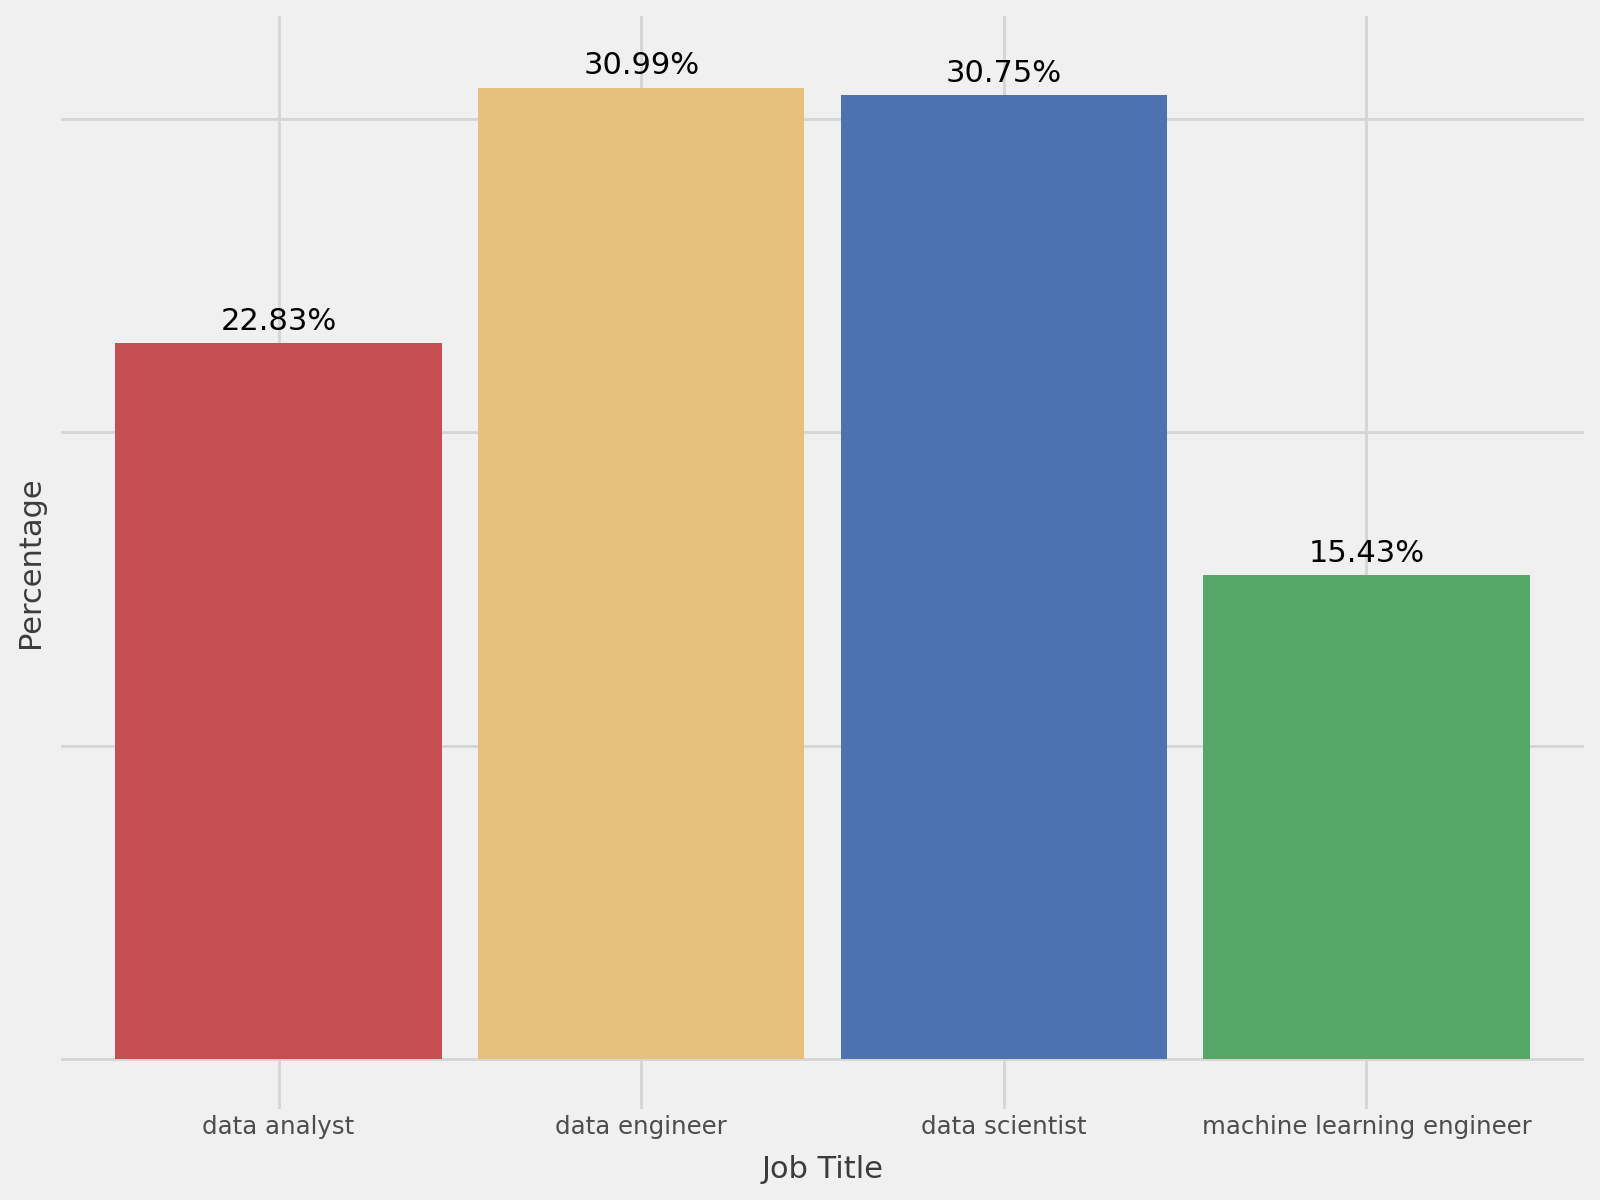

In [280]:
(
    ggplot(data, aes(x = "job_title"))
    + geom_bar(aes(y = after_stat("count / sum(count) *100"), fill = "job_title"))
    + geom_text(aes(y = after_stat("prop*100"), label = after_stat("prop*100"),group = 1),stat = "count", format_string = "{:.2f}%",nudge_y = 0.7)
    + scale_fill_manual(cols, guide = None)
    + labs(y = "Percentage", x = "Job Title")
    + theme(axis_text_y=element_blank(),axis_ticks_y=element_blank(), figure_size = (8,6))
)

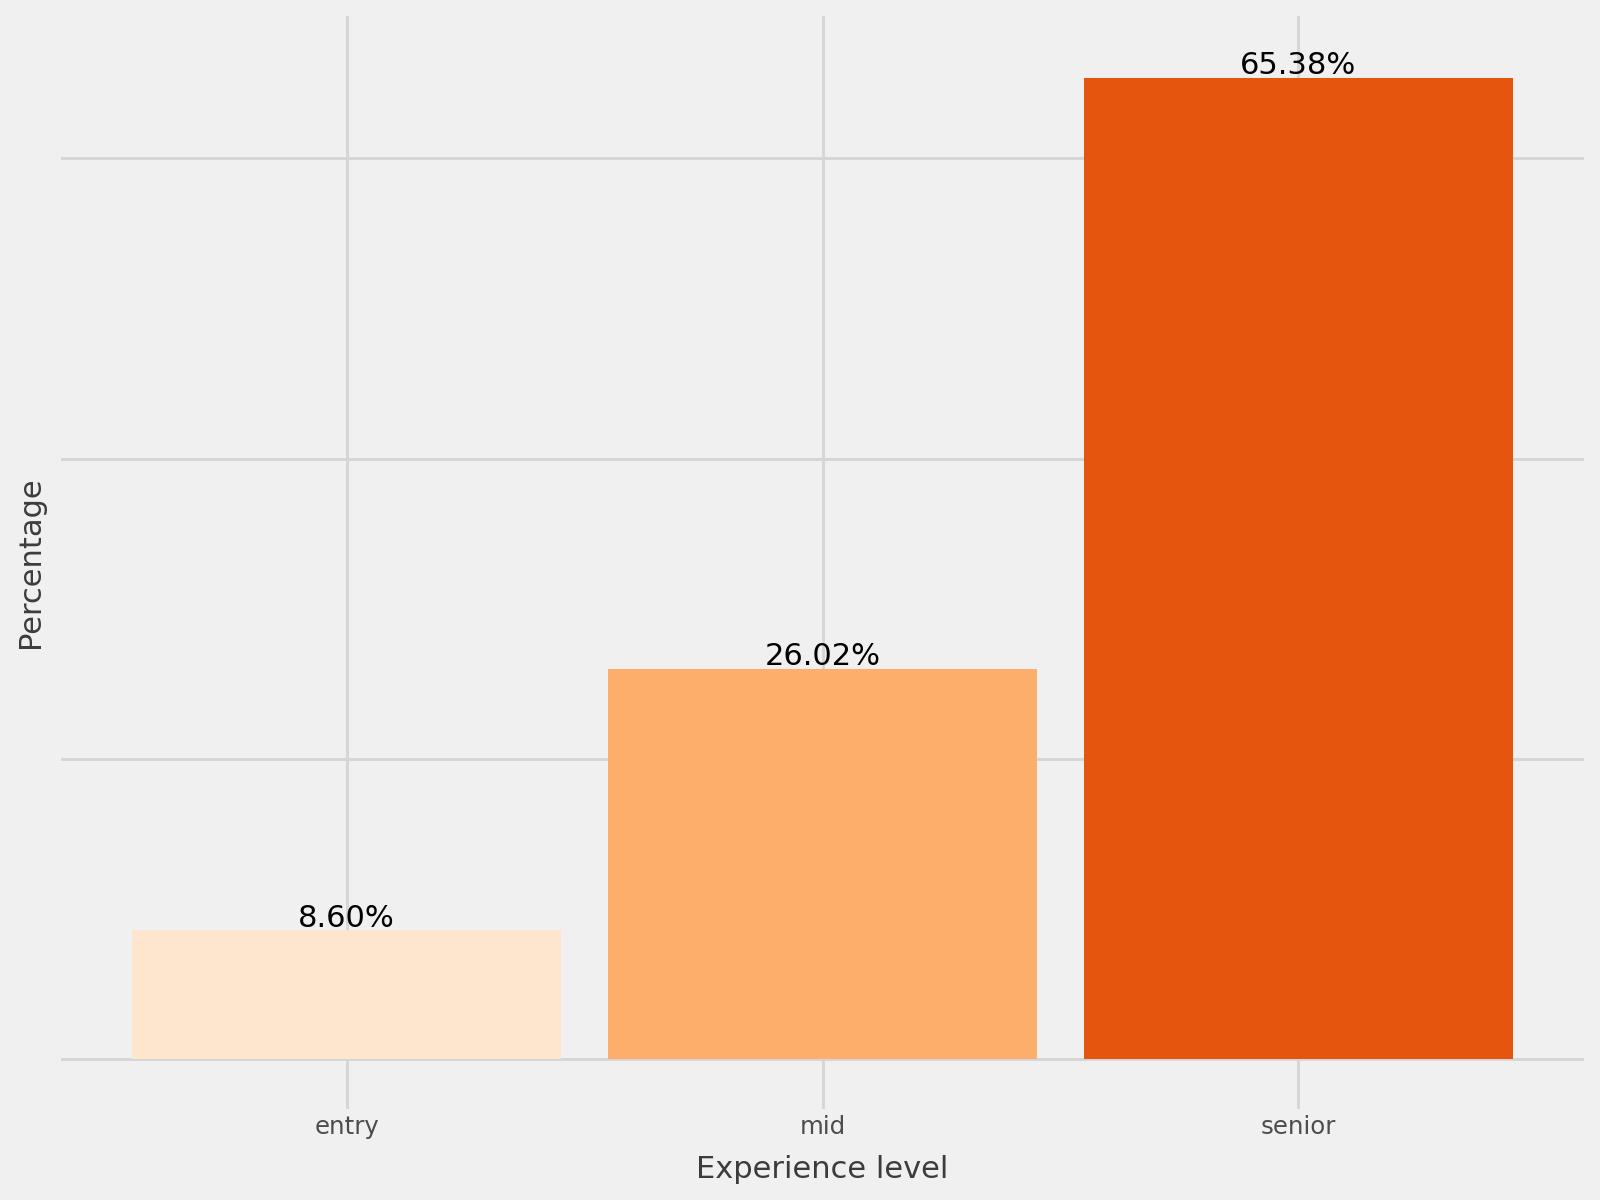

In [281]:
(
    ggplot(data, aes(x="experience_level",fill = "experience_level"))
    + geom_bar(aes(y = after_stat("count / sum(count)*100")))
    + geom_text(aes(y = after_stat("prop * 100"), label = after_stat("prop *100"),group = 1), stat = "count", format_string = "{:.2f}%", nudge_y = 0.8)
    + scale_fill_brewer(palette="Oranges",guide = None)
    + labs(y="Percentage", x = "Experience level")
    + theme(axis_ticks_x=element_blank(),axis_ticks_y=element_blank(),axis_text_y=element_blank(), figure_size=(8,6))
)

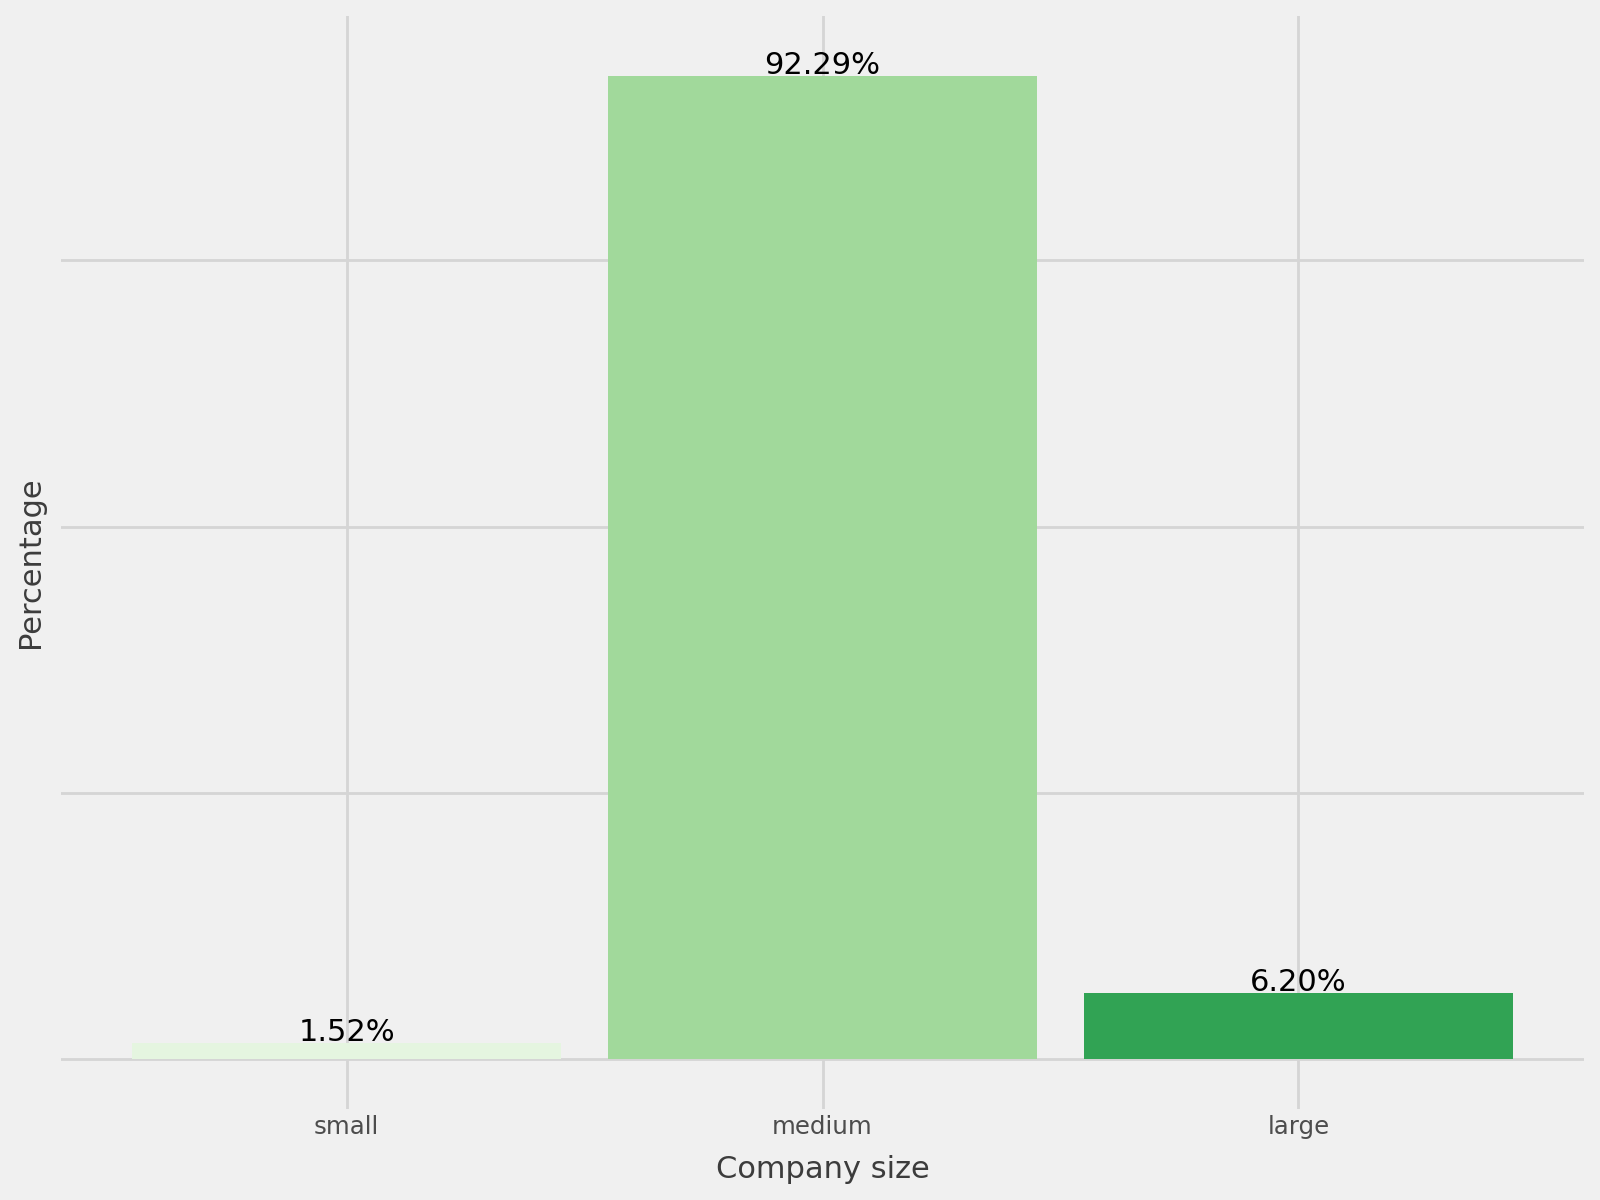

In [282]:
(
    ggplot(data, aes(x = "company_size", fill = "company_size"))
    + geom_bar(aes(y = after_stat("count / sum(count) *100")), stat = "count")
    + geom_text(aes(y = after_stat("prop * 100"), label = after_stat("prop *100"),group = 1), stat = "count", format_string = "{:.2f}%", nudge_y = 1)
    + scale_fill_brewer(palette = "Greens",guide = None)
    + theme(axis_ticks_y=element_blank(),axis_text_y=element_blank(), figure_size=(8,6))
    + labs(y="Percentage", x = "Company size")
)

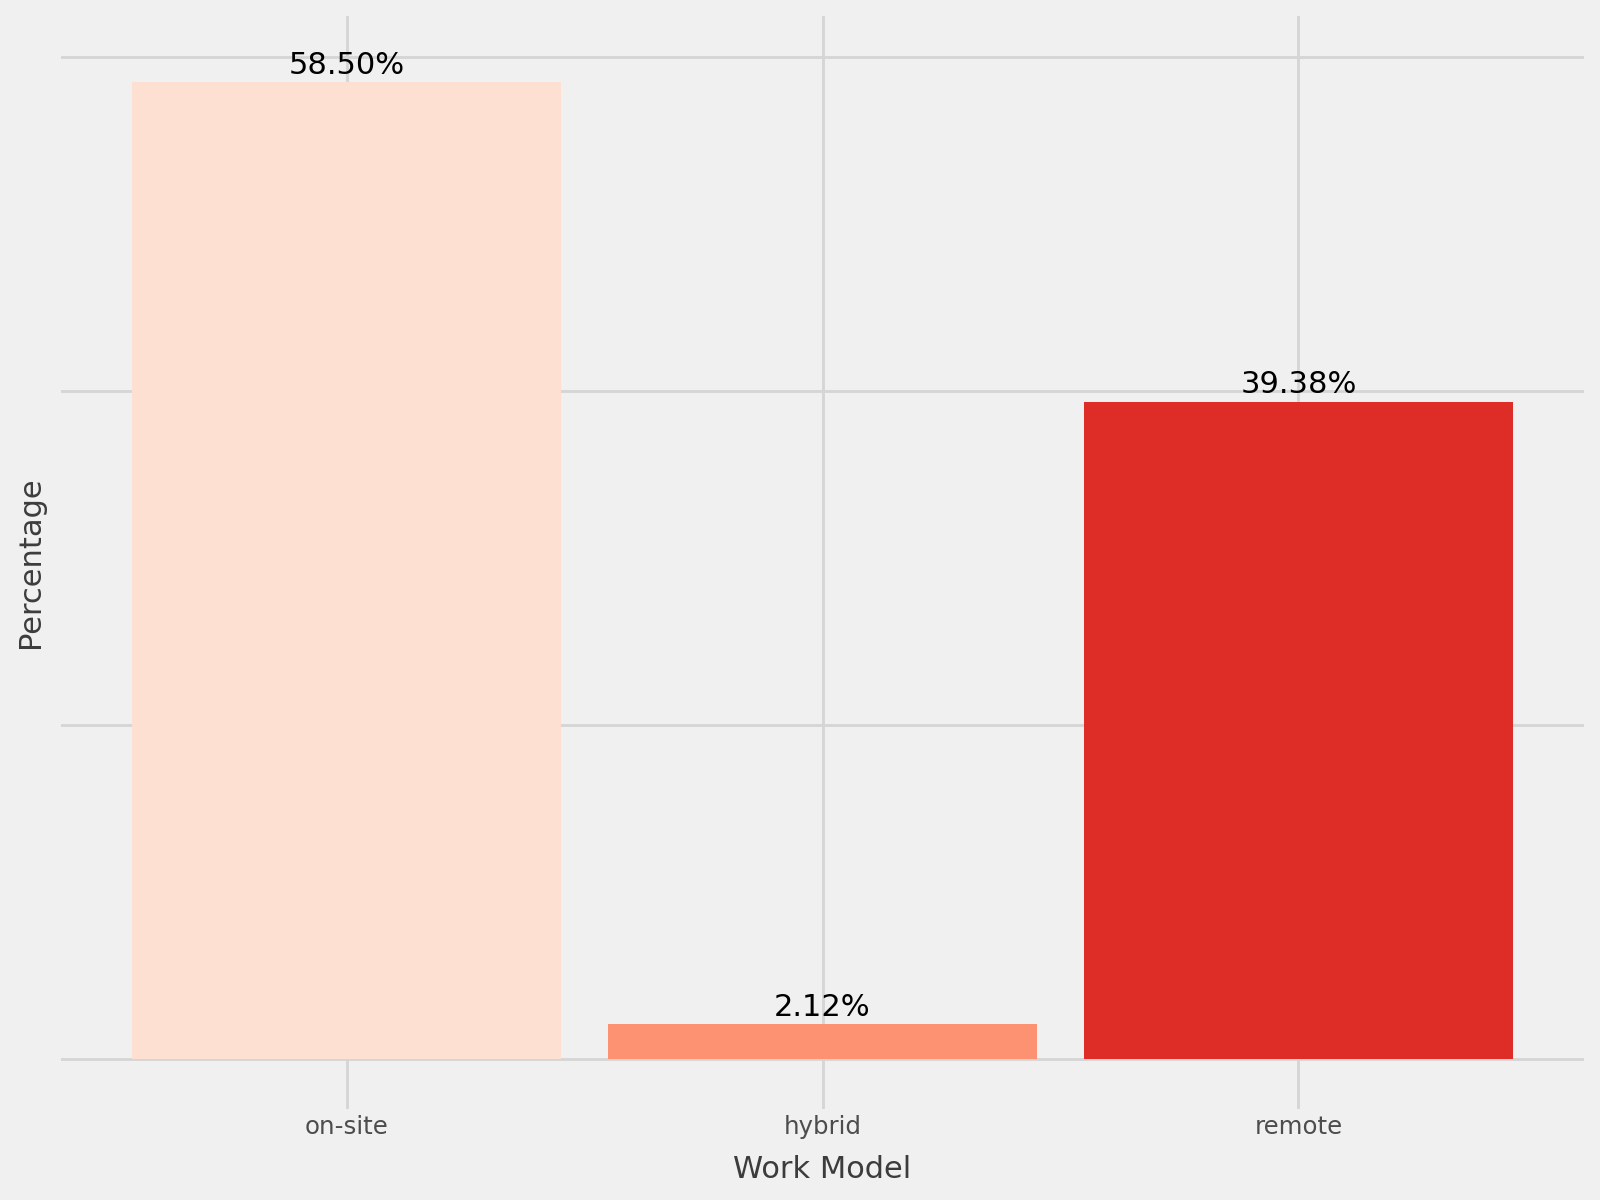

In [283]:
(
    ggplot(data, aes(x = "work_models", fill = "work_models"))
    + geom_bar(aes(y = after_stat("count / sum(count) * 100")), stat = "count")
    + geom_text(aes(y = after_stat("prop*100"), label = after_stat("prop *100"), group = 1), stat = "count", format_string = "{:.2f}%", nudge_y = 1)
    + scale_fill_brewer(palette="Reds",guide = None)
    + labs(x = "Work Model", y = "Percentage")
    + theme(figure_size=(8,6), axis_ticks_y=element_blank(), axis_text_y=element_blank())
)

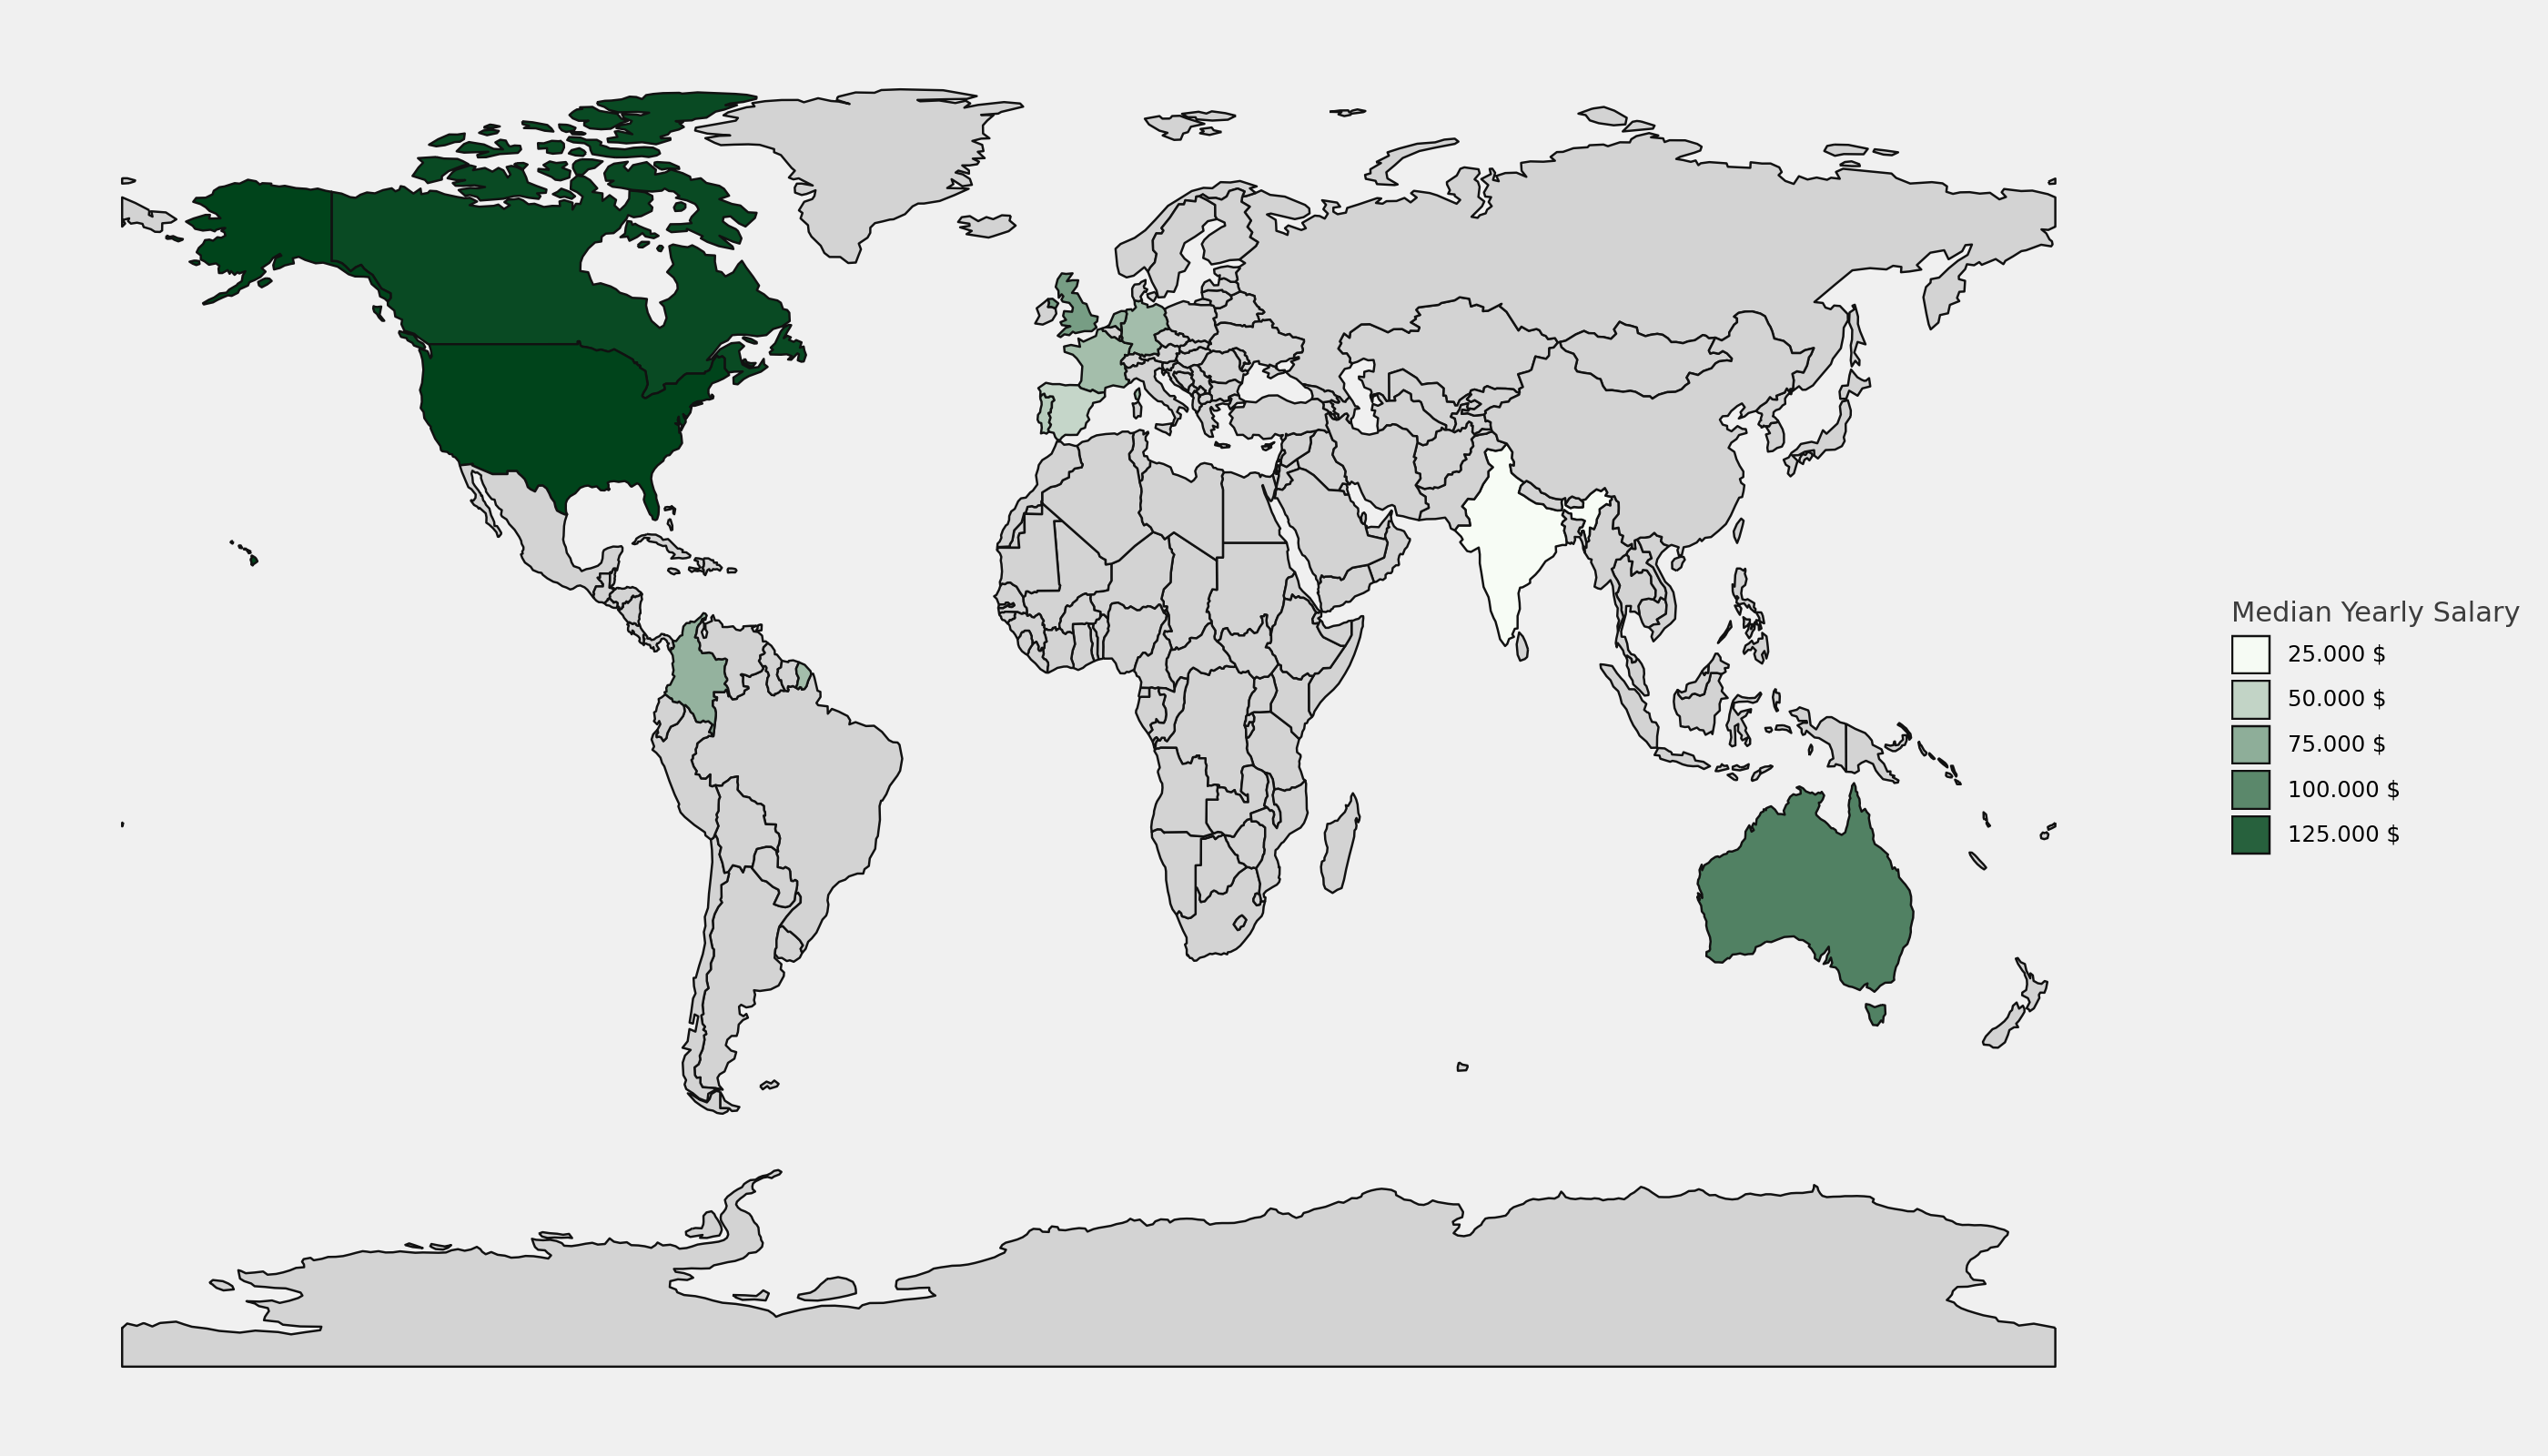

In [284]:
def labeller1(x):
    return("{:,.0f} $".format(x).replace(",","."))

(
    ggplot(salary_median, aes(fill = "salary_in_usd"))
    + geom_map()
    + theme(figure_size=(14,8), axis_text_x=element_blank(), axis_text_y=element_blank(),panel_grid=element_blank())
    + scale_fill_gradient(name = "Median Yearly Salary", 
                          low = "#f7fcf5", high="#00441b", 
                          guide = "legend", 
                          na_value="lightgrey",
                          labels=lambda l: [labeller1(x) for x in l])
)

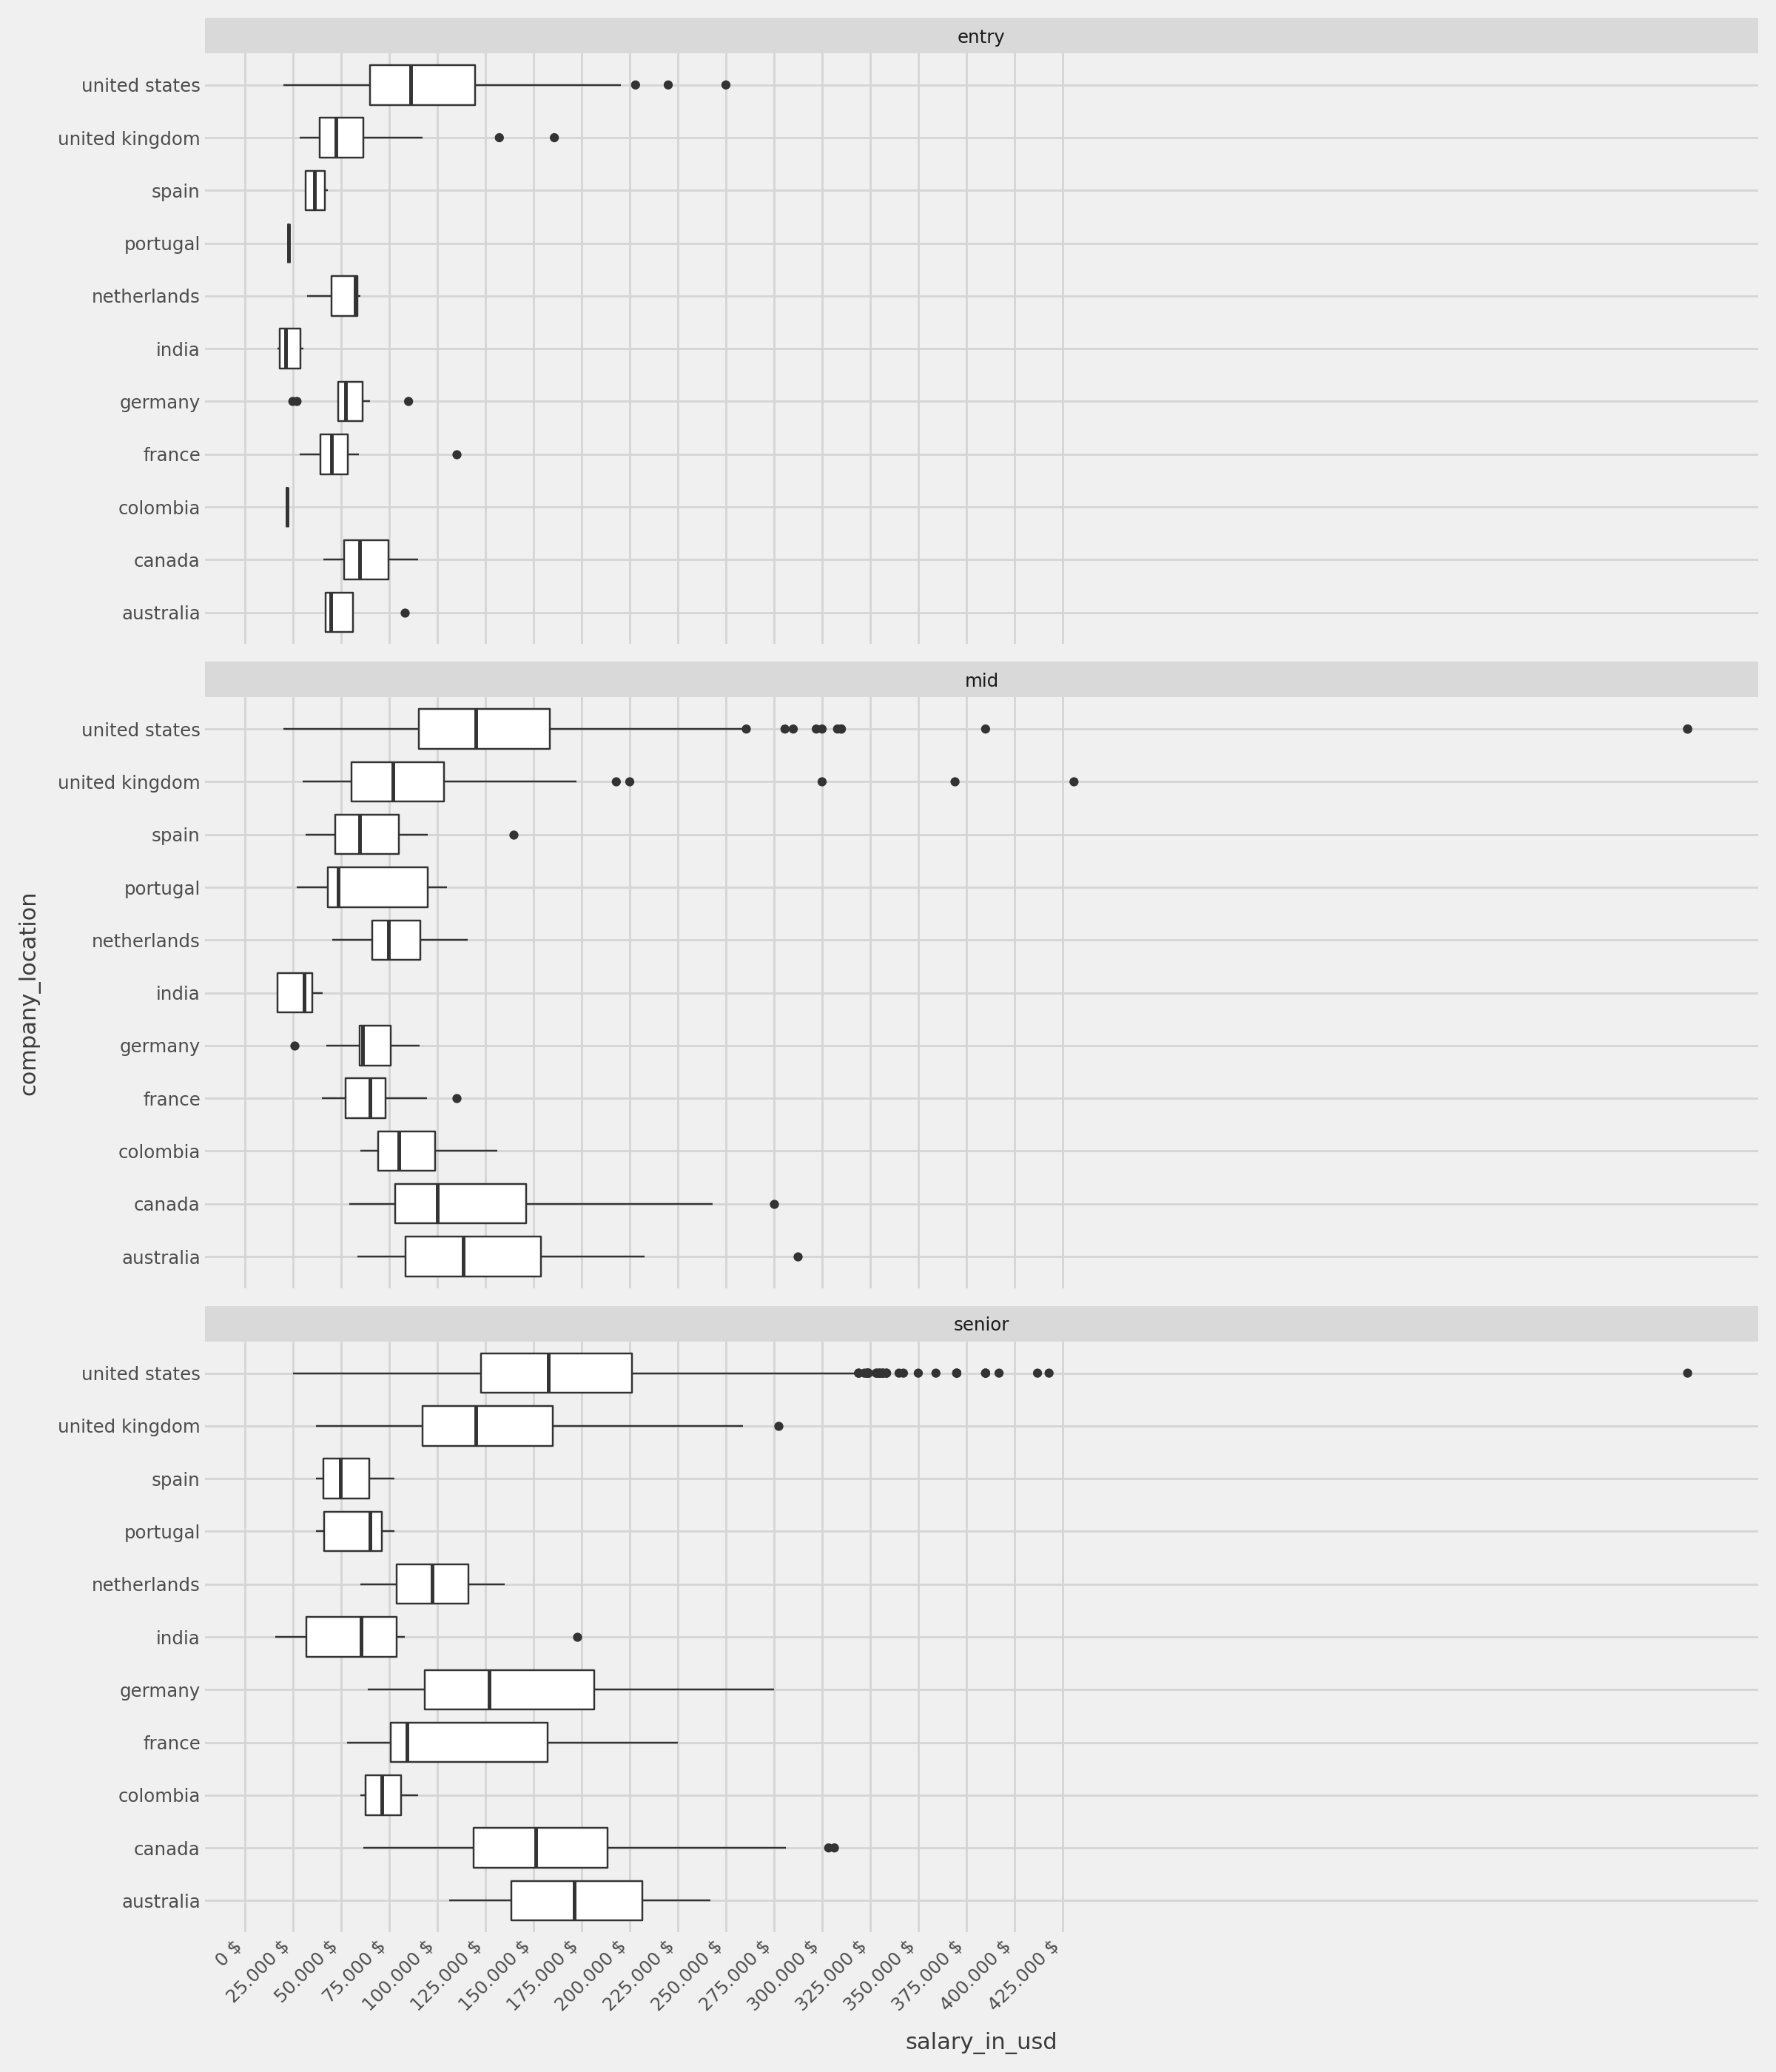

In [285]:
(
    ggplot(data, aes(x='company_location', y='salary_in_usd'))
    + geom_boxplot()
    + scale_y_continuous(breaks = range(0,450000,25000), 
                         labels = lambda l: [labeller1(x) for x in l])
    + facet_wrap("experience_level", scales="fixed", ncol=1)
    + theme(figure_size=(12, 14), axis_text_x=element_text(rotation=45, ha='right'))
    + coord_flip()
)

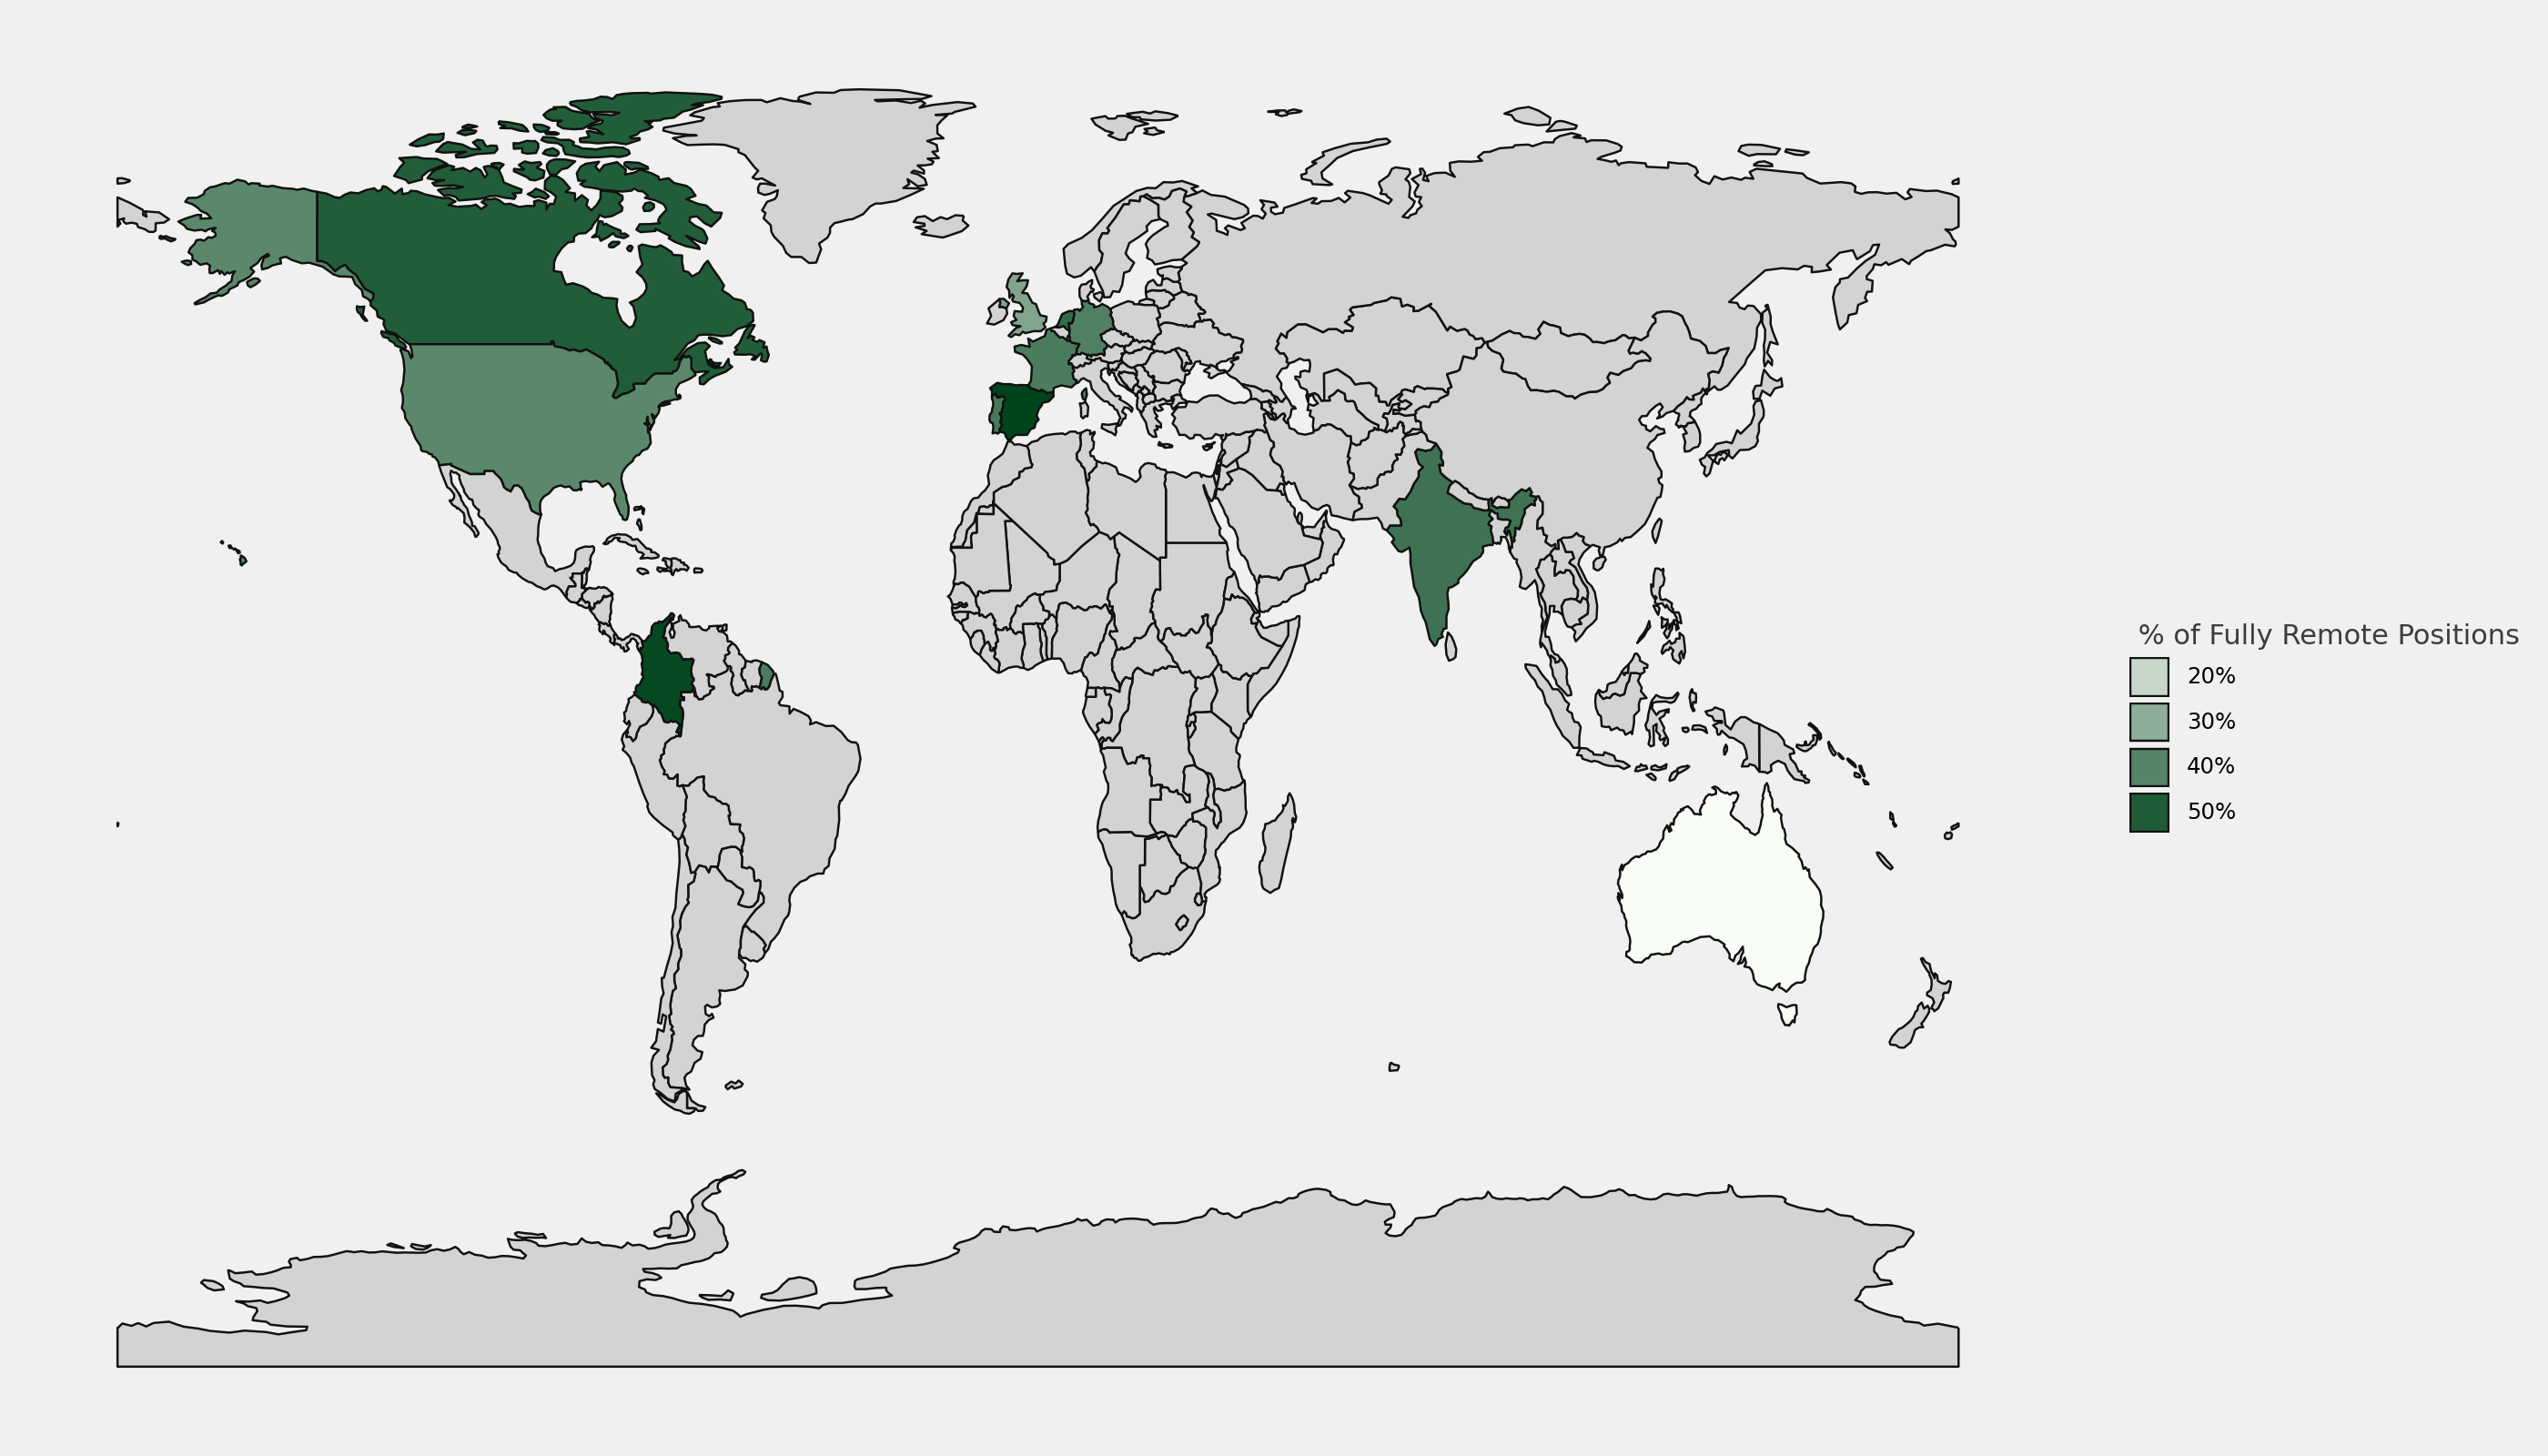

In [286]:
(
    ggplot(remote_prop, aes(fill = "work_models"))
    + geom_map()
    + theme(figure_size=(14,8), 
            axis_text_x=element_blank(), 
            axis_text_y=element_blank(),
            panel_grid=element_blank())
    + scale_fill_gradient(name = " % of Fully Remote Positions", 
                          low = "#f7fcf5", high="#00441b", 
                          guide = "legend", 
                          na_value="lightgrey", 
                          labels = ("20%","30%","40%","50%"))
)

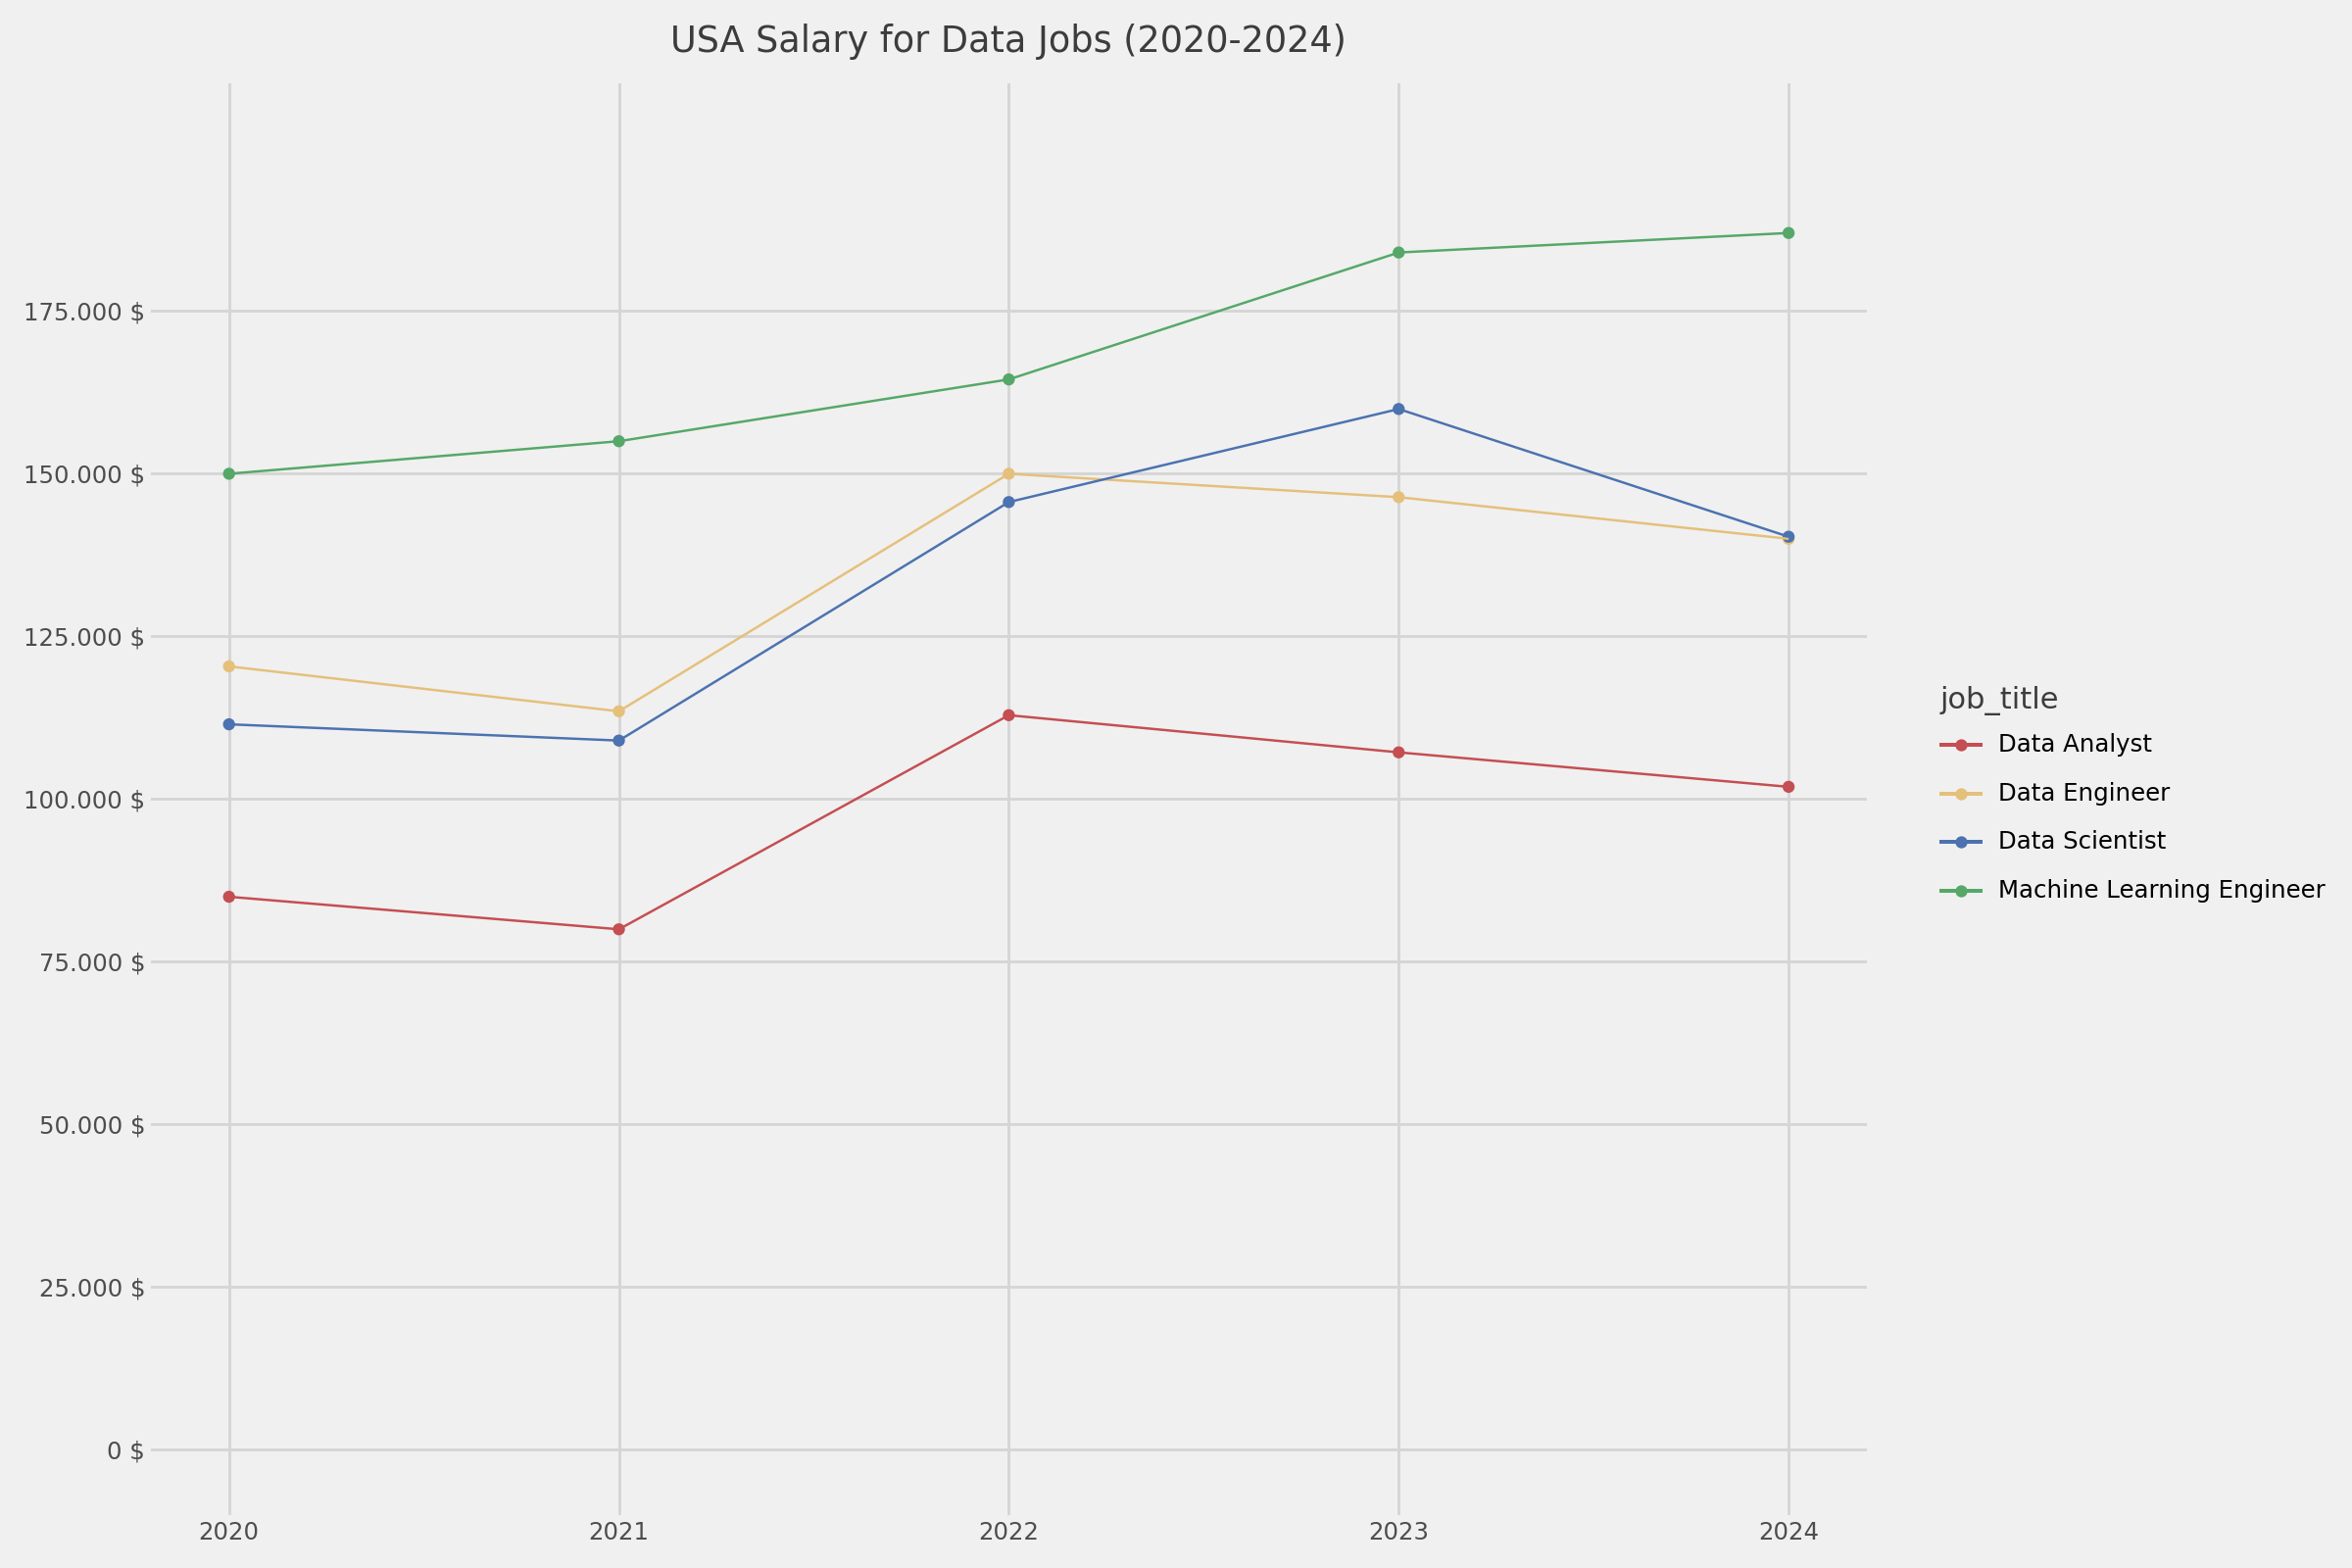

In [287]:
(
    ggplot(salaries_job_title, aes(x='work_year', y='salary_in_usd', color = 'job_title', group ='job_title')) 
    + scale_y_continuous(labels = lambda l: [labeller1(x) for x in l], limits = (0,200000), breaks = range(0,200000,25000)) 
    + geom_point()
    + geom_line()
    + scale_color_manual(cols, 
                         labels = lambda l: [x.title() for x in l])
    + labs(title = "USA Salary for Data Jobs (2020-2024)", x = "",y = "")
    + theme(figure_size=(12,8))
)

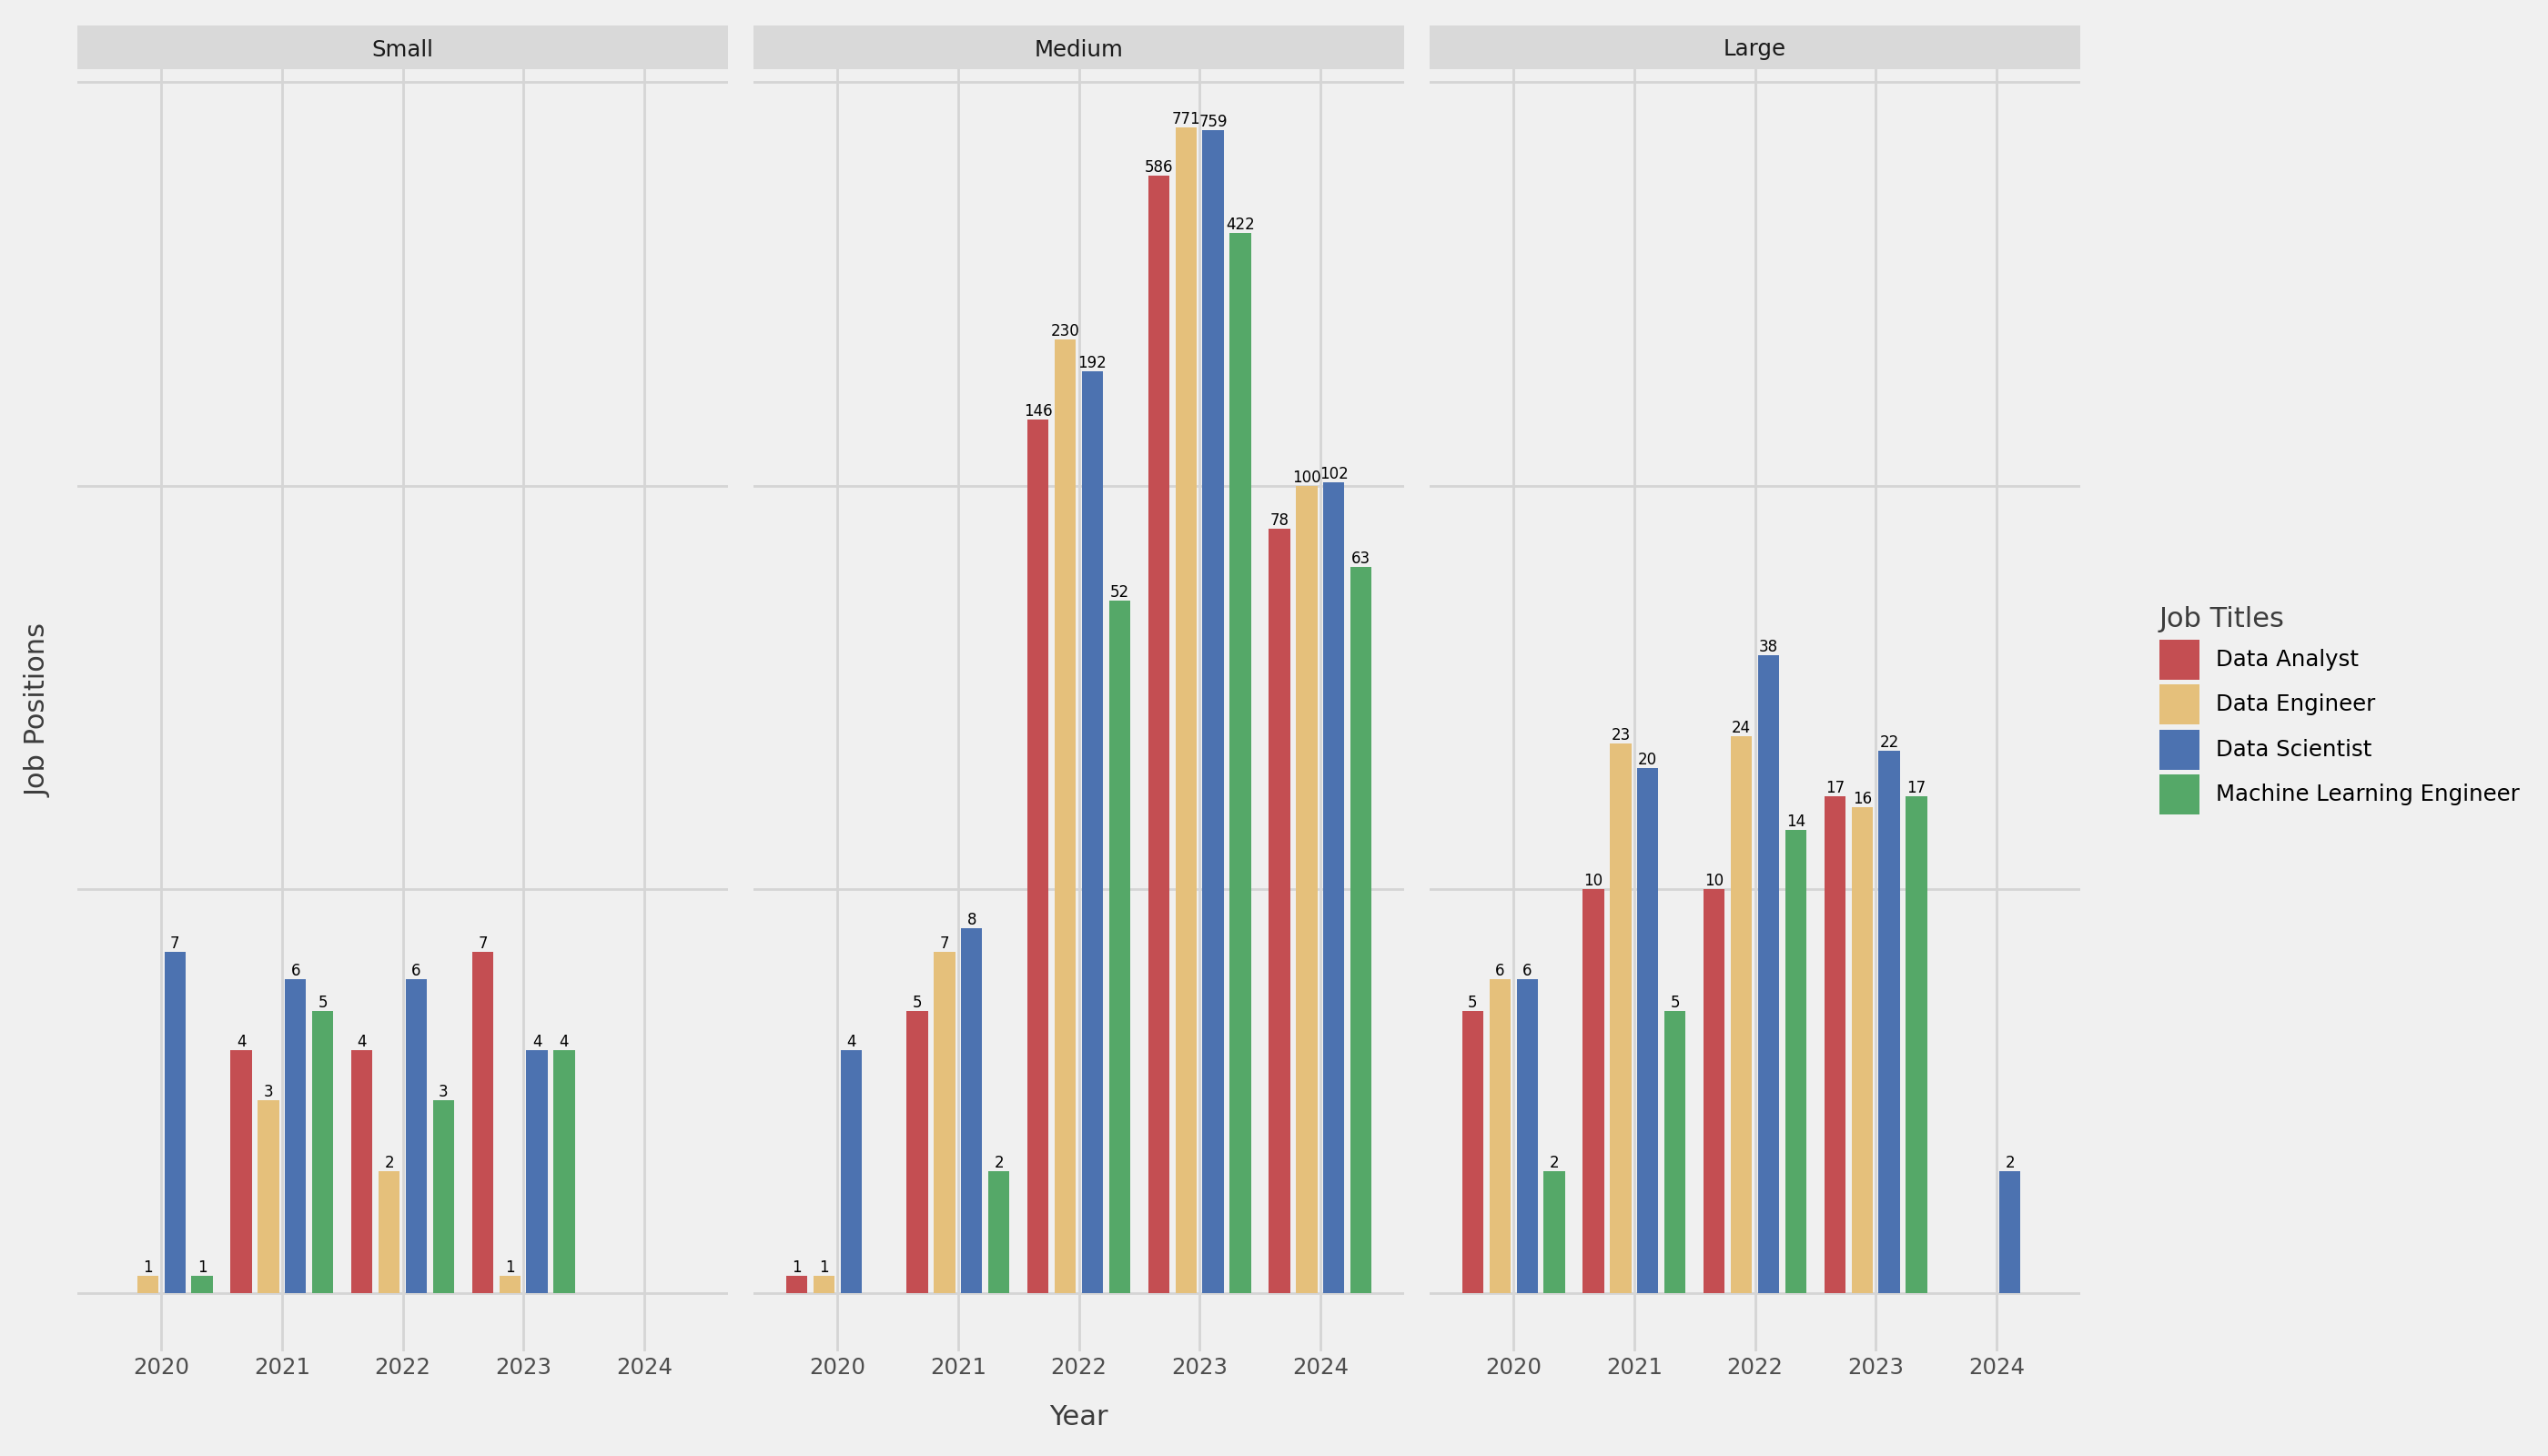

In [288]:
(
    ggplot(hiring_per_year.replace(1,1.1), aes(x='work_year', y = 'job_positions', fill = 'job_title')) 
    + scale_y_log10()
    + geom_col(position=position_dodge(width=0.9),
               width=0.7,
               na_rm=True)
    + facet_grid(cols = "company_size",
                 labeller = lambda x: x.capitalize())
    + scale_fill_manual(cols,
                        labels = lambda l: [x.title() for x in l])
    + theme(figure_size=(14,8),
            axis_text_y=element_blank(),
            axis_ticks_y=element_blank())
    + labs(x = "Year",y = "Job Positions", fill = "Job Titles")
    + geom_text(aes(label = 'job_positions'),
                size = 6,
                position=position_dodge(width=0.9),
                va='bottom',
                format_string = "{:.0f}",
                na_rm=True)

)

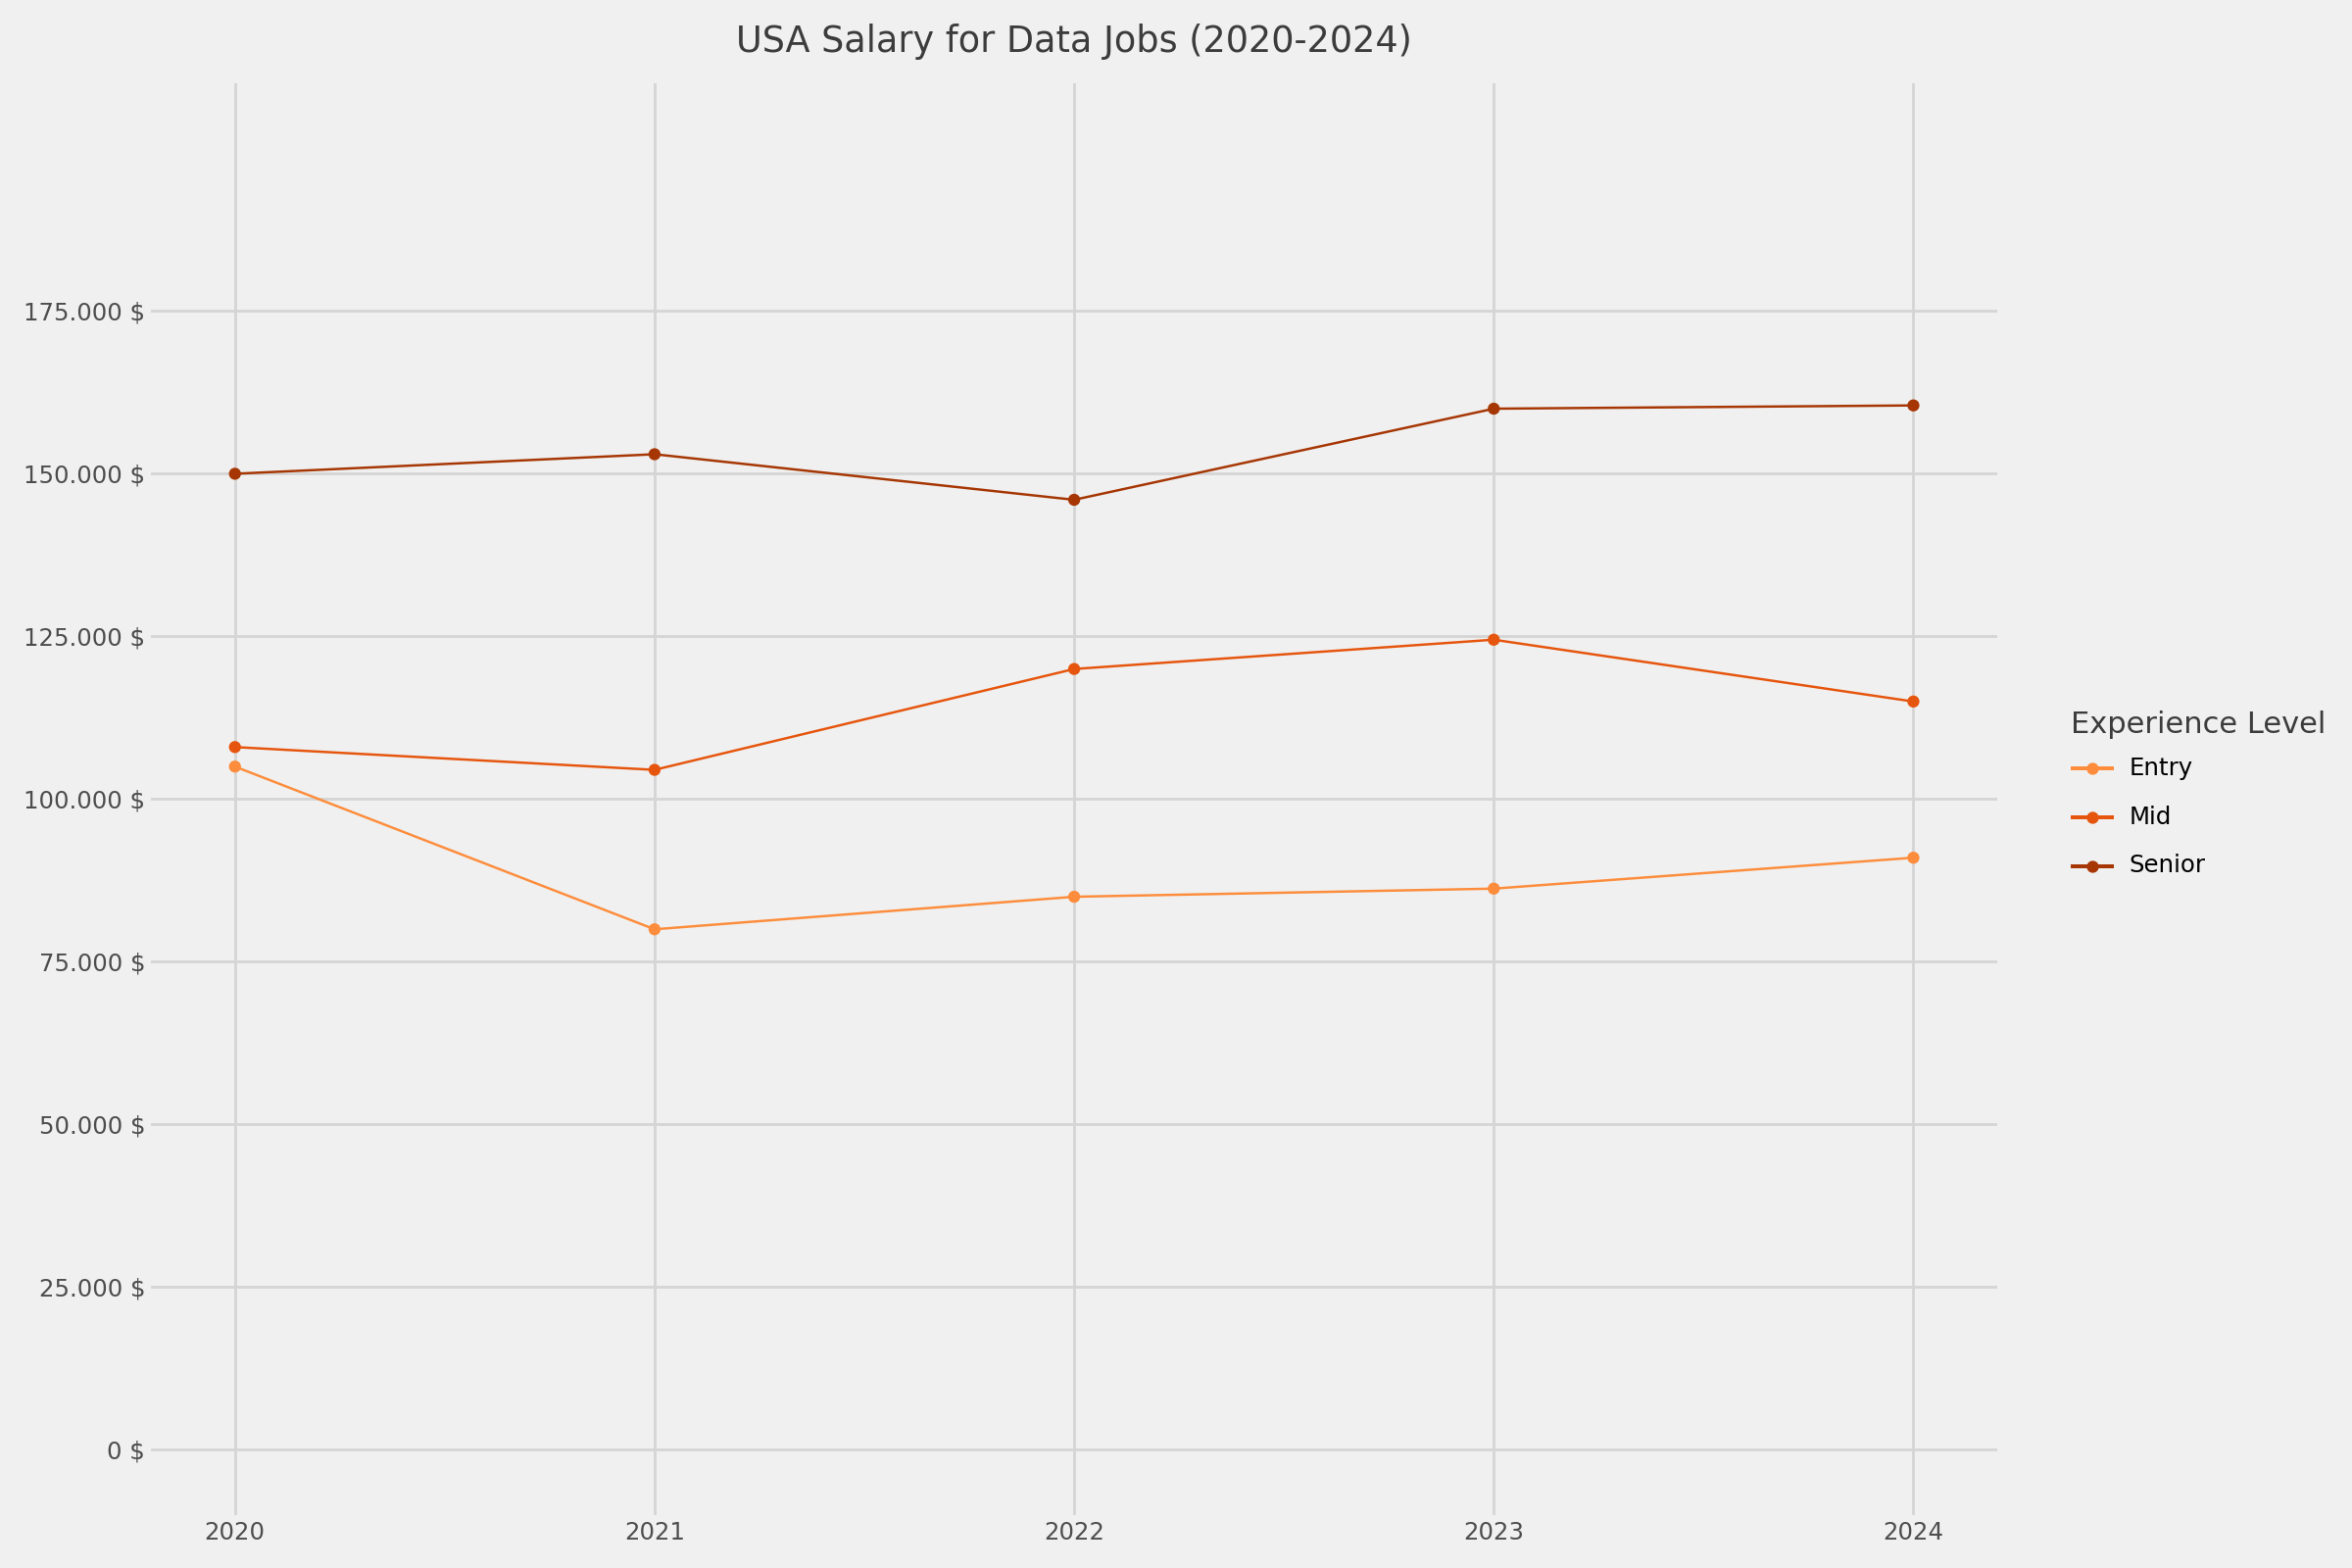

In [289]:
(
    ggplot(salaries_exp_level, aes(x='work_year', y='salary_in_usd', color = 'experience_level', group ='experience_level')) 
    + scale_y_continuous(labels = lambda l: [labeller1(x) for x in l], limits = (0,200000), breaks = range(0,200000,25000)) 
    + geom_point()
    + geom_line()
    + scale_color_manual(values = ["#fd8d3c","#e6550d","#a63603"],
                         labels = lambda l: [x.title() for x in l])
    + labs(title = "USA Salary for Data Jobs (2020-2024)", x = "",y = "", color = "Experience Level")
    + theme(figure_size=(12,8))
)

In [290]:
data

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,matched_name,ADMIN,geometry
0,data engineer,mid,full-time,remote,2024,united states,148100,usd,148100,united states,medium,United States of America,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
1,data engineer,mid,full-time,remote,2024,united states,98700,usd,98700,united states,medium,United States of America,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
2,data scientist,senior,full-time,remote,2024,united states,140032,usd,140032,united states,medium,United States of America,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
3,data scientist,senior,full-time,remote,2024,united states,100022,usd,100022,united states,medium,United States of America,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
4,data scientist,mid,full-time,remote,2024,united states,148100,usd,148100,united states,medium,United States of America,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,data scientist,entry,full-time,on-site,2020,germany,43200,eur,49268,germany,small,Germany,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
3820,data engineer,entry,full-time,remote,2020,pakistan,48000,eur,54742,germany,large,Germany,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
3821,data engineer,mid,full-time,remote,2020,germany,51999,eur,59303,germany,small,Germany,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
3822,data scientist,mid,full-time,on-site,2020,germany,70000,eur,79833,germany,large,Germany,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


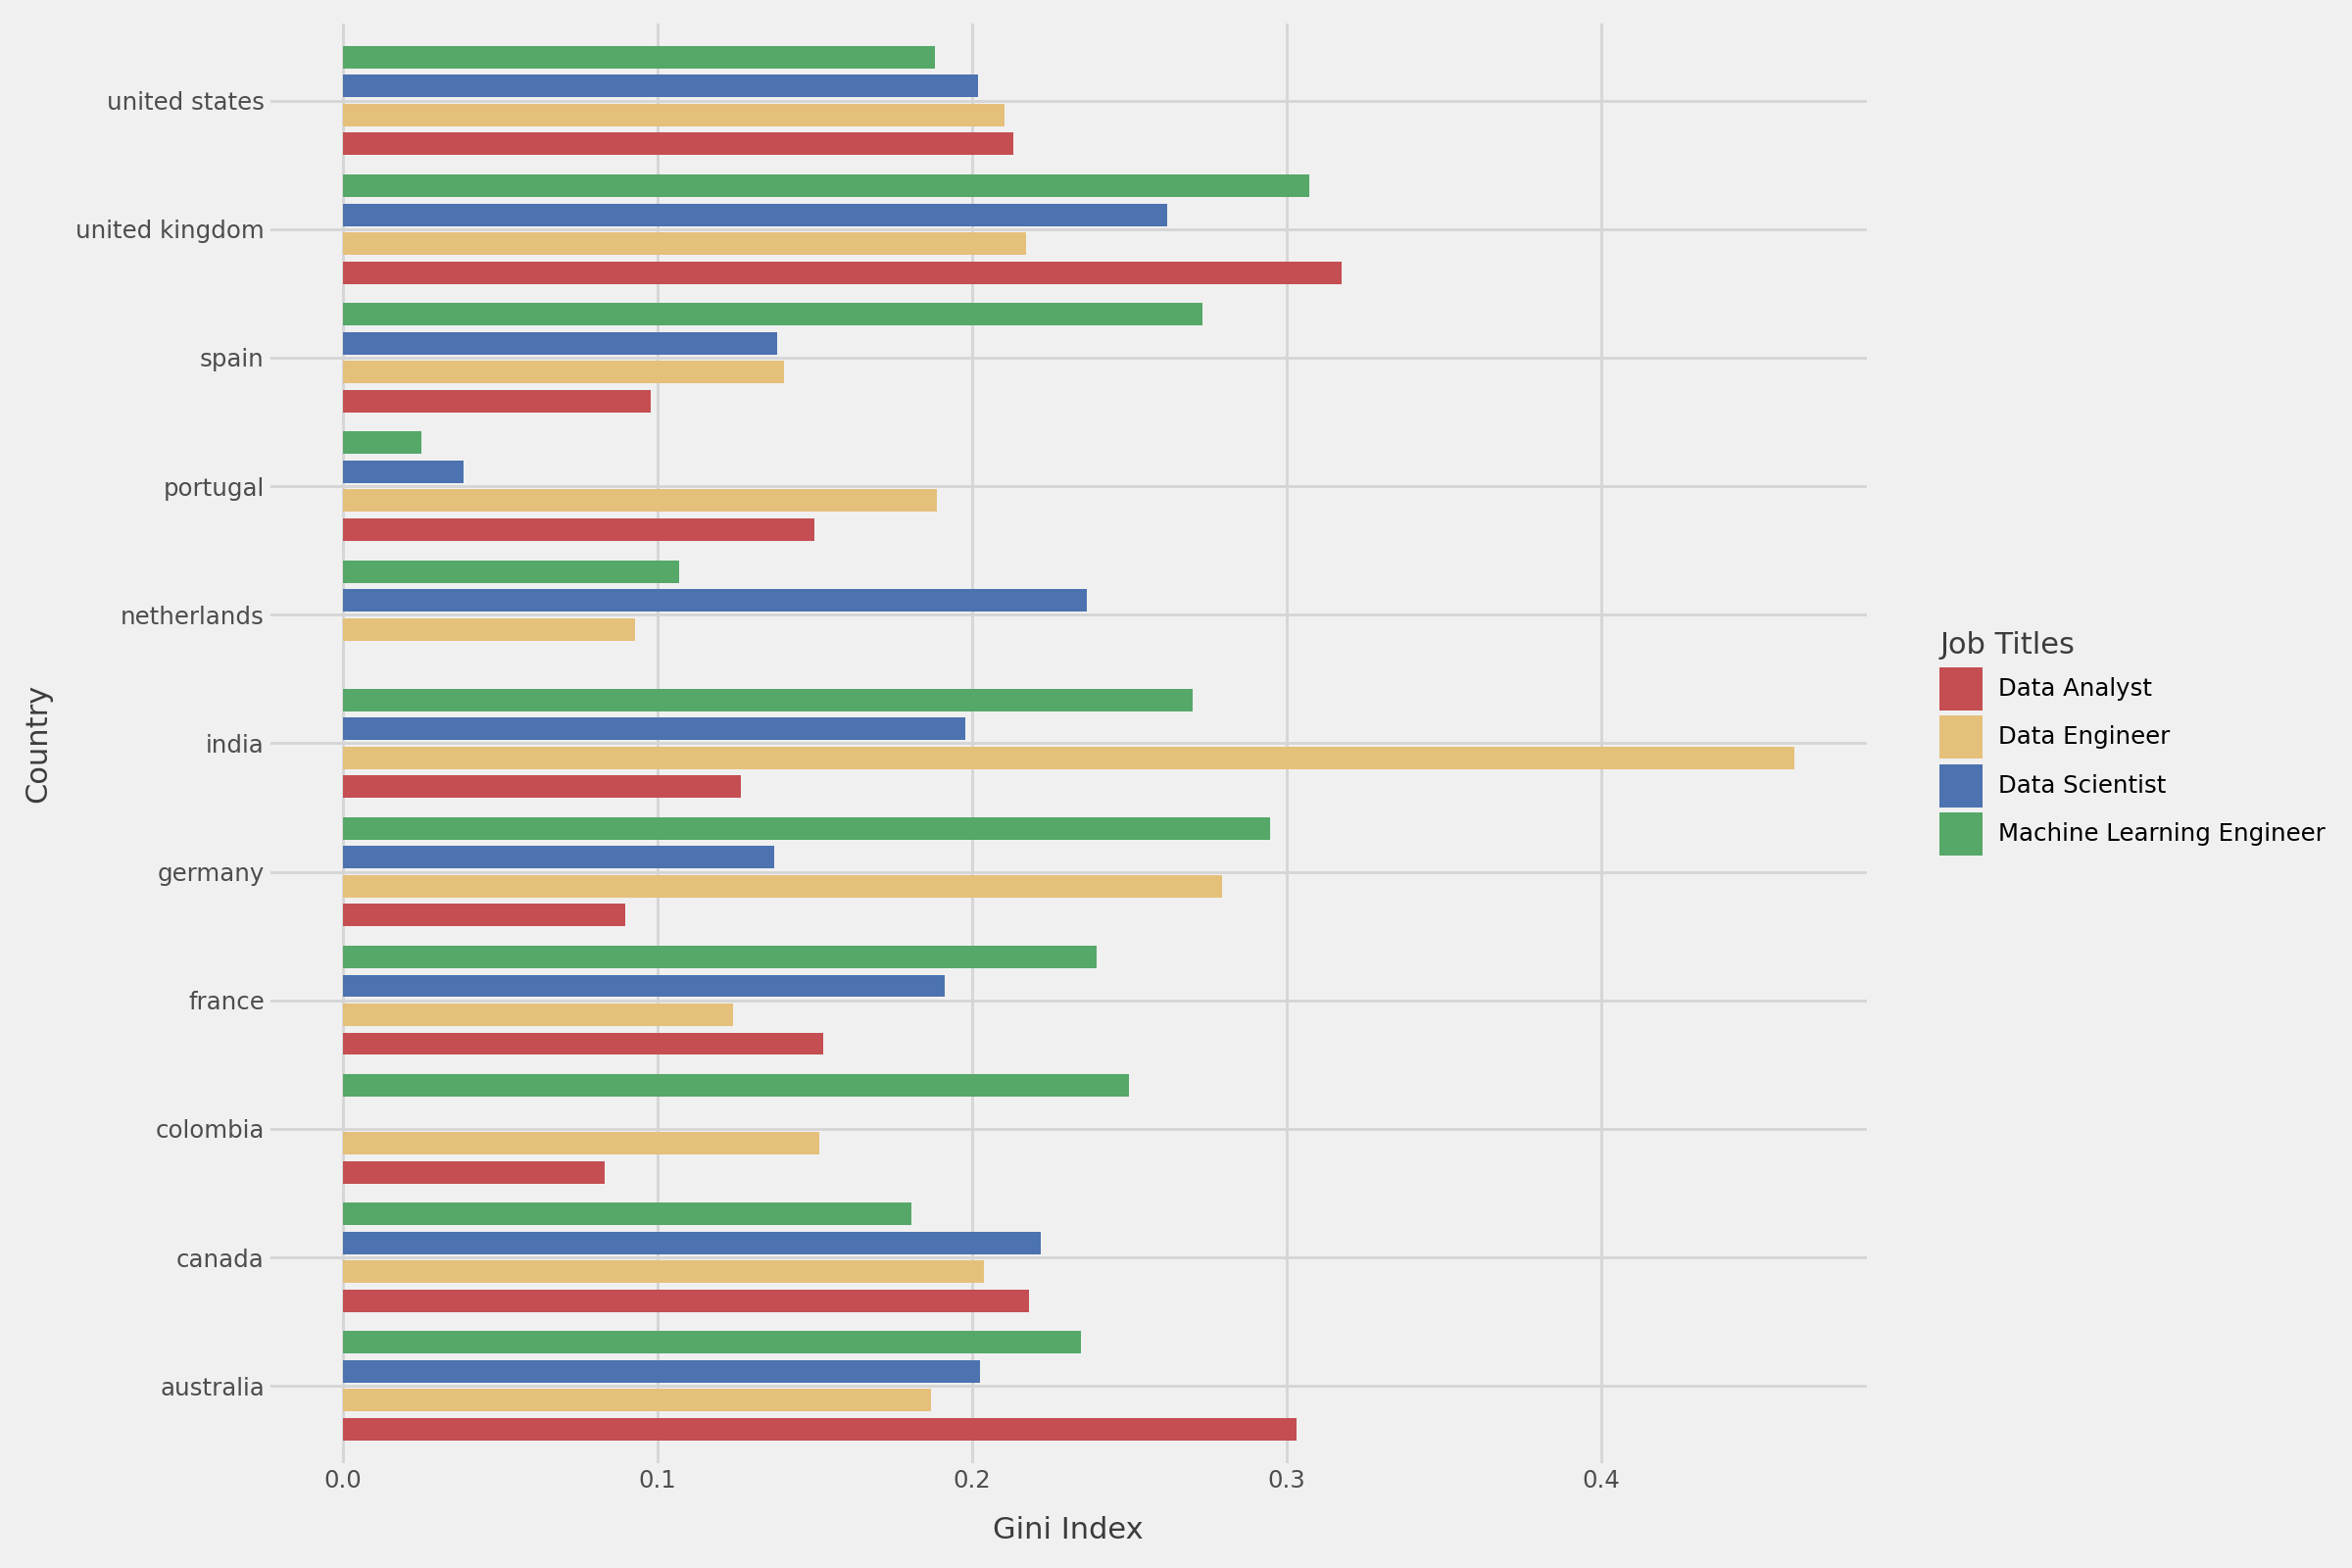

In [293]:
(
    ggplot(gini_index, aes(x='company_location', y = 'gini_index', fill = 'job_title')) 
    + geom_col(position=position_dodge(width=0.9),
               width=0.7,
               na_rm=True)
    + scale_fill_manual(cols,
                        labels = lambda l: [x.title() for x in l])
    + theme(figure_size=(12,8))
    + labs(x = "Country",y = "Gini Index", fill = "Job Titles")
    + coord_flip()

)